# DrScratch++ Metrics

## Documentation

### Steps for preproccess the data
1. Collect the data from Drive
   
    1. I have taken the file **CT4ALL-Master Spreadsheet**, and then i have concatenated each tab (from Adamson to Chaffe Toulmin) in order to crate a single spreadsheet. The name of the file that storage this is: *CT4ALL-Master Spreadsheet.csv*
    2. After this i have triangulated the master_df with the triang_df, **i have chosen the index *'Game Project Link'* instead of *'Project ID'* because there was projects  with game links and no IDs in the BIG_ct4all_master.csv**

2. Extract *Game links* for batch-mode

    1. Saved in file **batch_master_links.txt**
        - There are several projects with diferent urls but same project names, we have follow the indications add (1).sb3, (2).sb3 etc..
  
3. Create **Game Attributes** csv:

    - There's a problem with the project names, this is that there are several projects with the same name but different links, this affects to the web scrapping script, and all the organzation. The pattern followed for repeated project names it's *name_(1).sb3, name_(2).sb3* and so on. This is why a script now has to be created to synchronize these repeated projects automatically in the csv, taking into account the chosen pattern. (I want to go to sleep)
    - After download projects, create a csv with the each url and his project name. (This it's necessary for triangulate with the metrics csv from DrScratch analysis, i mean each url with own name and result
    - We have to separate de two possible genre of games.

4. Triangulate **Game Attributes** csv with **DrScratch Metrics** csv

### Steps for graph the data

5. Create **subsets** according to each *Main Genre* and *Second Genre*

6. Graph in different chars.

    - 6.1. Spider chart
        - All projects.
        - Graph Main Genre.
        - Graph Second Genre.
    
    - 6.2 Heatmap chart.
        - All projects.
        - Graph Main Genre.
        - Graph Second Genre.

    - 6.3 Histogram and KDE Plot chart.
        - All projects.
        - Graph Main Genre.
        - Graph Second Genre.

### QUESTIONS
    - Is the game genre good?, because there are main genres that are "Storytelling, Action" in a single column
    - Why there are so many projects 640!!!???
    - In the paper, what is D0, D1, D2, ...

In [1]:
import pandas as pd

## 1. Collect and import data

In [2]:
projects_list_df = pd.read_csv('projects_list.csv')

## 2. Extract *Game links* for batch-mode

In [3]:
# 2. Extract *Game links* for batch-mode
game_links = projects_list_df['Link']
game_genre = projects_list_df['Genre']

## 3. Create **Game Attributes** csv:

#### Create names with pattern for avoid repeated names

#### Create a pd column for check if that project name exists in the folder (NEW_METRICS/projects_sb3

## 4. Triangulate **Game Attributes** csv with **DrScratch++ Metrics** main.csv

In [4]:
# Import DrScratch metrics
metrics_new = pd.read_csv('./ce7fb137-16c4-4ba7-b18d-743f61e67f21_20240905224716/main.csv')
metrics_old = pd.read_csv('./paper-csv-old-metrics.csv')

print(metrics_old.head)

<bound method NDFrame.head of                                           url                   filename  \
0  https://scratch.mit.edu/projects/165070872         Carbon Clicker.sb3   
1  https://scratch.mit.edu/projects/218168859  Adventures of TreeGuy.sb3   
2  https://scratch.mit.edu/projects/129177311   Save the Atmosphere!.sb3   
3  https://scratch.mit.edu/projects/212068226          Ice Cap Hero!.sb3   
4  https://scratch.mit.edu/projects/143170691         Carbon Crusher.sb3   
5  https://scratch.mit.edu/projects/210270408             Pet Earth!.sb3   
6  https://scratch.mit.edu/projects/213865007     Amanda and Joyce-2.sb3   
7  https://scratch.mit.edu/projects/213497977      heewon and audrey.sb3   
8  https://scratch.mit.edu/projects/142790748            Albedo Pong.sb3   
9  https://scratch.mit.edu/projects/213257497   Anjali and Mariana-3.sb3   

   points Abstraction Parallelism Logic Synchronization Flow control  \
0      14         1/3         3/3   1/3             3/3      

In [5]:
metrics_new_attr = pd.merge(projects_list_df, metrics_new, left_on='Link', right_on='url', how='outer')
metrics_old_attr = pd.merge(projects_list_df, metrics_old, left_on='Link', right_on='url', how='outer')

print(metrics_old_attr)

                                         Link                   Name  \
0  https://scratch.mit.edu/projects/129177311   Save The Atmosphere!   
1  https://scratch.mit.edu/projects/142790748            Albedo Pong   
2  https://scratch.mit.edu/projects/143170691         Carbon Crusher   
3  https://scratch.mit.edu/projects/165070872         Carbon Clicker   
4  https://scratch.mit.edu/projects/210270408             Per Earth!   
5  https://scratch.mit.edu/projects/212068226          Ice Cap Hero!   
6  https://scratch.mit.edu/projects/213257497             CO2 Pacman   
7  https://scratch.mit.edu/projects/213497977      Plants vs Zomseas   
8  https://scratch.mit.edu/projects/213865007   Eco Friendly Choices   
9  https://scratch.mit.edu/projects/218168859  Adventures of TreeGuy   

               Genre                                         url  \
0  Swipe Elimination  https://scratch.mit.edu/projects/129177311   
1               Pong  https://scratch.mit.edu/projects/142790748   
2  

In [6]:
metrics_new_attr.to_csv('metrics_new_attr.csv')
metrics_old_attr.to_csv('metrics_old_attr.csv')

## 5. Create **subsets** according to each *Main Genre* and *Second Genre*

In [7]:
# Firs we are going to create the subsets for Main Genre
main_genres = metrics_new_attr['Genre'].dropna().unique()
main_genres_subsets_new = {}
for genre in main_genres:
    if genre != None:
        main_genres_subsets_new[genre] = metrics_new_attr[metrics_new_attr['Genre'] == genre]

main_genres_old = metrics_old_attr['Genre'].dropna().unique()
main_genres_subsets_old = {}
for genre in main_genres_old:
    if genre != None:
        main_genres_subsets_old[genre] = metrics_old_attr[metrics_old_attr['Genre'] == genre]
        
print(main_genres_subsets_old)



{'Swipe Elimination':                                          Link                  Name  \
0  https://scratch.mit.edu/projects/129177311  Save The Atmosphere!   

               Genre                                         url  \
0  Swipe Elimination  https://scratch.mit.edu/projects/129177311   

                   filename  points Abstraction Parallelism Logic  \
0  Save the Atmosphere!.sb3      16         1/3         3/3   2/3   

  Synchronization Flow control User interactivity Data representation  \
0             3/3          3/3                2/3                 2/3   

  Math operators Motion operators  
0            0/3              0/3  , 'Pong':                                          Link         Name Genre  \
1  https://scratch.mit.edu/projects/142790748  Albedo Pong  Pong   

                                          url         filename  points  \
1  https://scratch.mit.edu/projects/142790748  Albedo Pong.sb3      12   

  Abstraction Parallelism Logic Synchronizati

## 6. Graph each subset (DrScratch metrics of each Game Genre).

### 6.1. Graph **Spider Graph**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **NEW METRICS**

## Individual metrics

Save The Atmosphere!


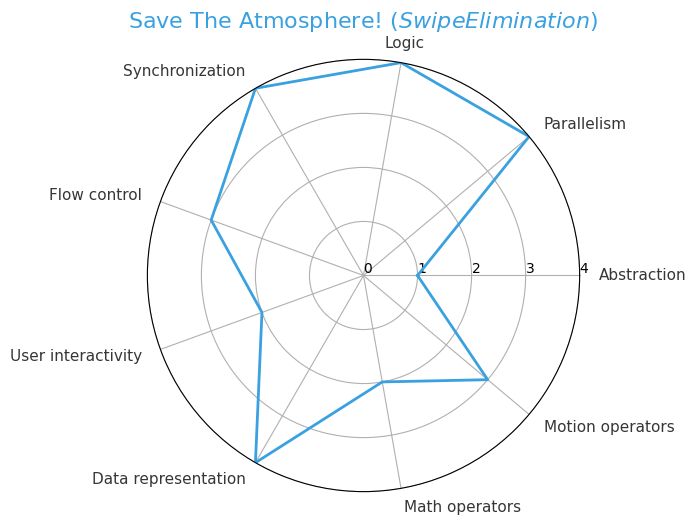

Albedo Pong


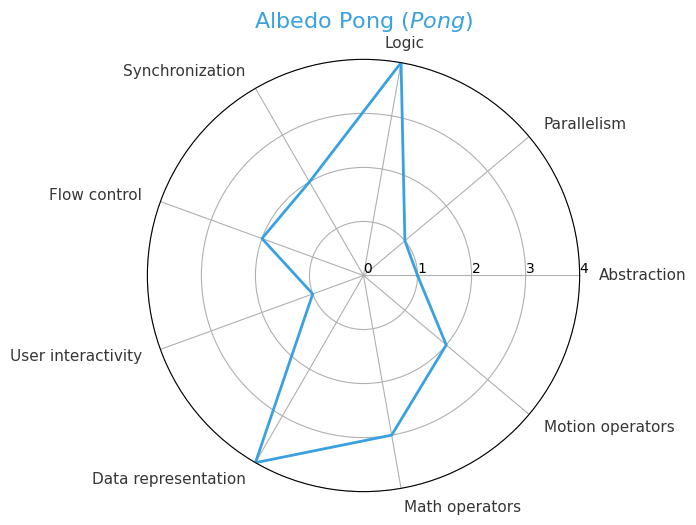

Carbon Crusher


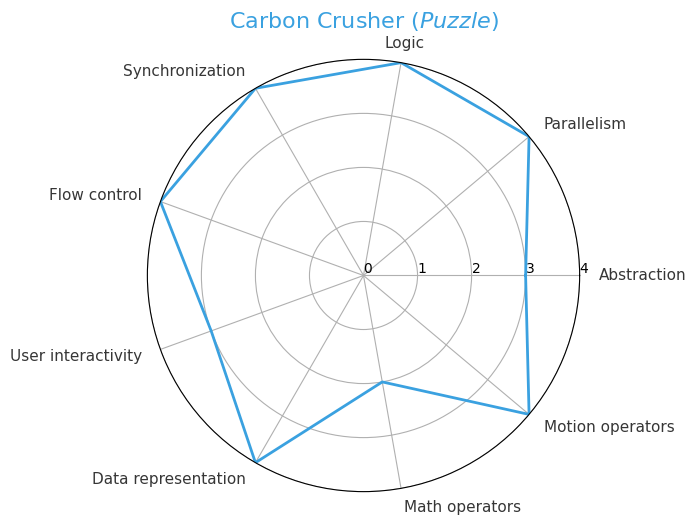

Carbon Clicker


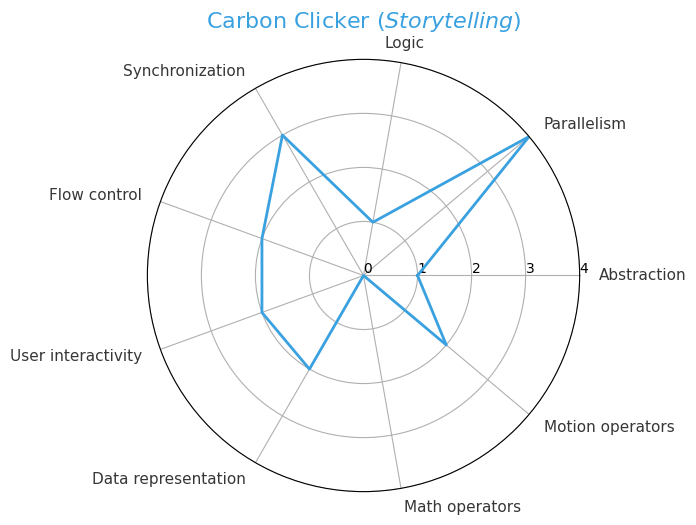

Per Earth!


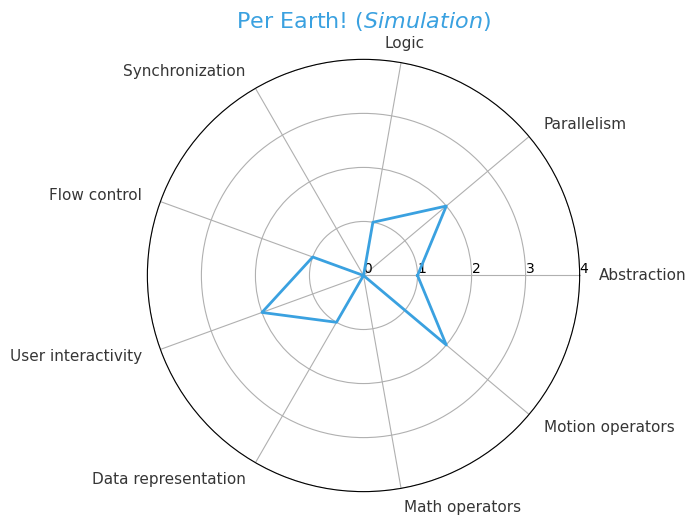

Ice Cap Hero!


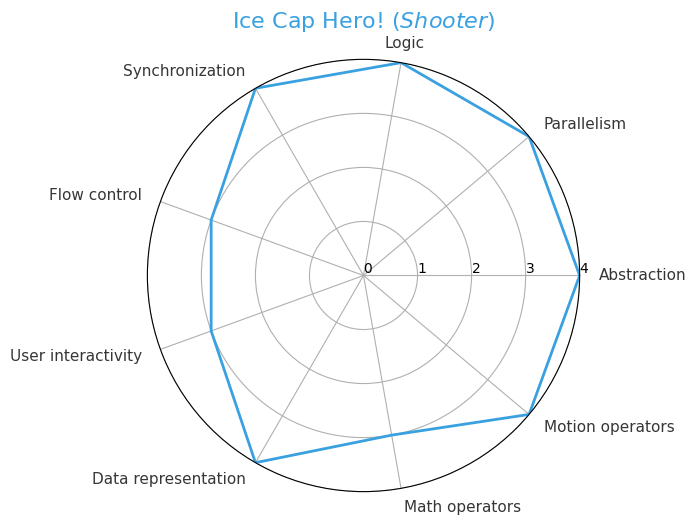

CO2 Pacman


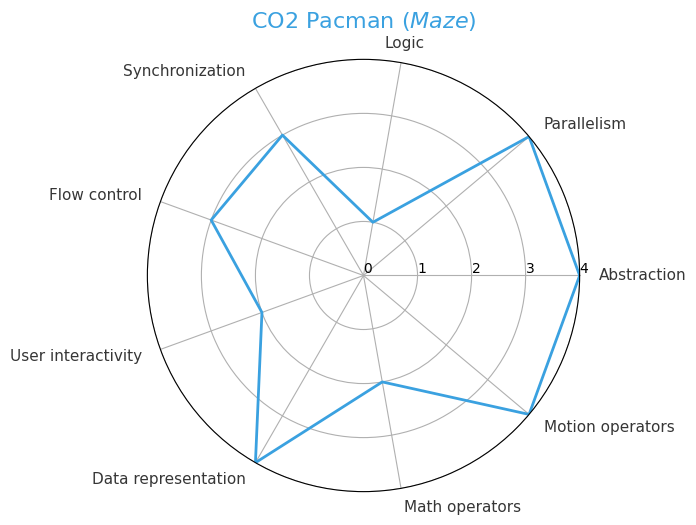

Plants vs Zomseas


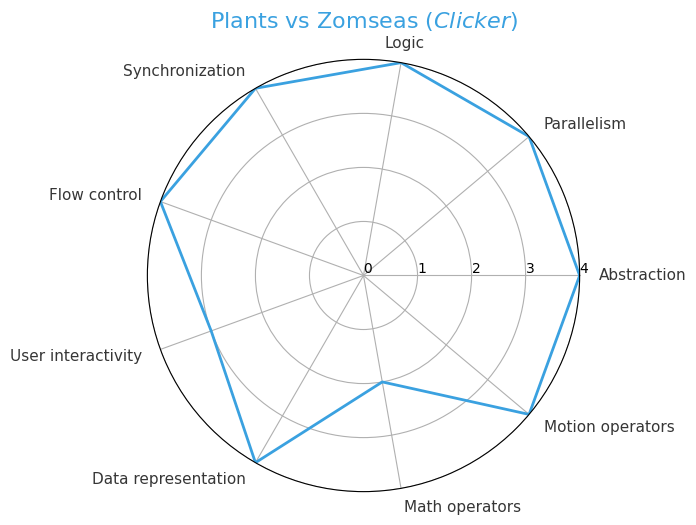

Eco Friendly Choices


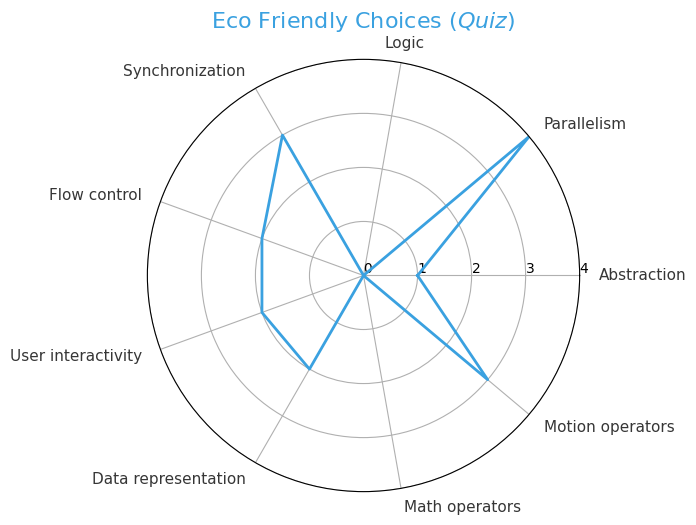

Adventures of TreeGuy


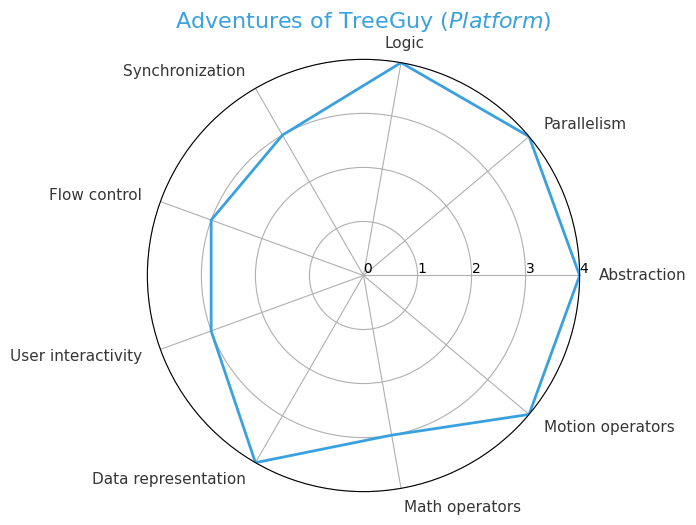

In [201]:
# CHOOSE DATAFRAME
for name, df in main_genres_subsets_new.items():
    # DATA PREPROCESSING
    project_name = df['Name'].tolist()[0]
    print(project_name)
    dims = df.iloc[:, 6:15]
    dims_names = dims.columns.tolist()
    dim_means = dims.apply(lambda x: x.str.split('/').str[0].astype(float)).mean()
    dim_means = [round(n,2) for n in dim_means]
    
    # ADAPTIONS TO GRAPH NAMES
    cat = dims_names
    val = dim_means
    
    # GRAPH
    num_vars = len(cat)
    angles = [n * 2 * np.pi / num_vars for n in range(num_vars)]
    angles += angles[:1]
    val += val[:1]
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    ax.plot(angles, val, color='#3aa1e0', linewidth=2)  
    ax.set_rlabel_position(0)  
    
    # DESIGN
    ax.set_ylim(0, 4) 
    ax.set_yticks(np.arange(0, 5, 1))
    plt.title(f'{project_name} ($\\it{{{name}}}$)', fontsize=16, color='#3aa1e0')
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(dims, fontsize=11, color='#363636')
    for label, angle in zip(ax.get_xticklabels(), angles):
        dim_name = label.get_text()
        if dim_name in ["Parallelism","Abstraction", "Math operators", "Motion operators"]:
            label.set_horizontalalignment('left')
        elif dim_name in ["Synchronization", "Flow control", "User interactivity", "Data representation"]:
            label.set_horizontalalignment('right')
   

    
    # ADJUST DESIGN
    plt.tight_layout()

    plt.savefig(f'./figs_new_metrics/individual_metrics/{name}.png')
    # SHOW GRAPH
    plt.show()
   

## ALL TOGETHER

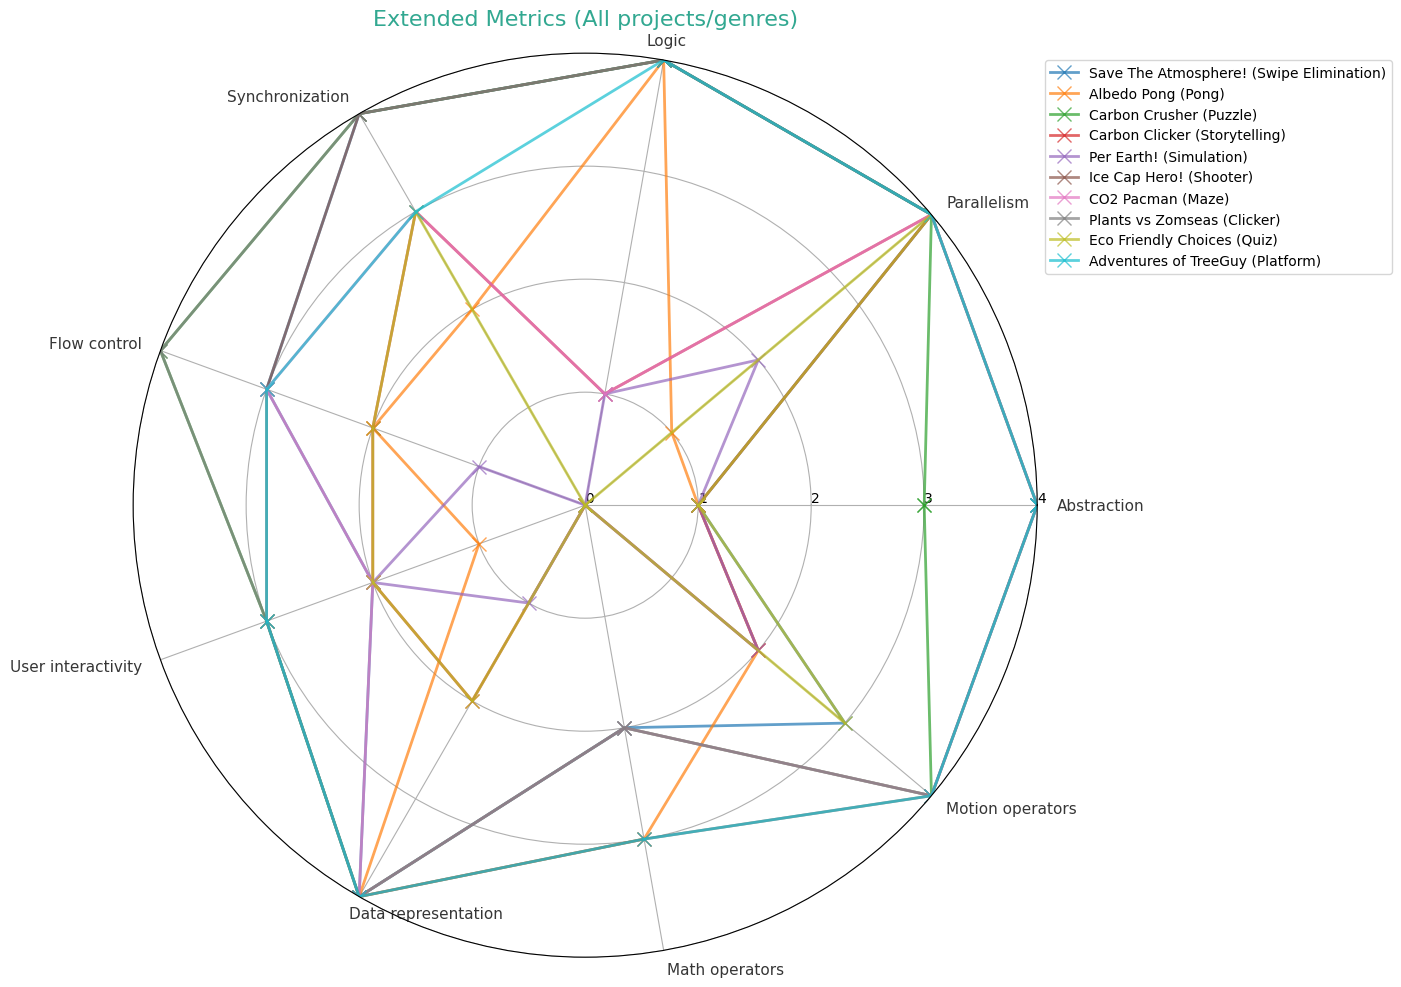

In [202]:
import numpy as np
import matplotlib.pyplot as plt

# Crear la figura y el eje polar
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(polar=True))

# Iterar sobre cada subconjunto en el diccionario `main_genres_subsets_old`
for name, df in main_genres_subsets_new.items():
    # Procesamiento de datos
    project_name = df['Name'].tolist()[0]
    dims = df.iloc[:, 6:15]
    dims_names = dims.columns.tolist()
    dim_means = dims.apply(lambda x: x.str.split('/').str[0].astype(float)).mean()
    dim_means = [round(n, 2) for n in dim_means]
    
    # Preparar datos para el gráfico
    num_vars = len(dims_names)
    angles = [n * 2 * np.pi / num_vars for n in range(num_vars)]
    angles += angles[:1]
    dim_means += dim_means[:1]

    # Graficar en el eje polar
    ax.plot(angles, dim_means, linewidth=2, label=f'{project_name} ({name})',markersize=10, marker='x',alpha=0.7)

# Configuración del diseño
ax.set_rlabel_position(0)  
ax.set_ylim(0, 4)
ax.set_yticks(np.arange(0, 5, 1))

# Adaptación de nombres de las dimensiones
ax.set_xticks(angles[:-1])
ax.set_xticklabels(dims_names, fontsize=11, color='#363636')
for label, angle in zip(ax.get_xticklabels(), angles):
    dim_name = label.get_text()
    if dim_name in ["Parallelism","Abstraction", "Math operators", "Motion operators", "Data representation"]:
        label.set_horizontalalignment('left')
    elif dim_name in ["Synchronization", "Flow control", "User interactivity"]:
        label.set_horizontalalignment('right')

# Añadir la leyenda y el título
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.title('Extended Metrics (All projects/genres)', fontsize=16, color='#32a891')

# Ajuste del diseño
plt.tight_layout()

# Guardar y mostrar el gráfico
plt.savefig('./figs_new_metrics/all_together_metrics/comparative_radar_chart.png', bbox_inches='tight')
plt.show()


## AGRUP OLD METRICS 5-5

Mediana: 27.0


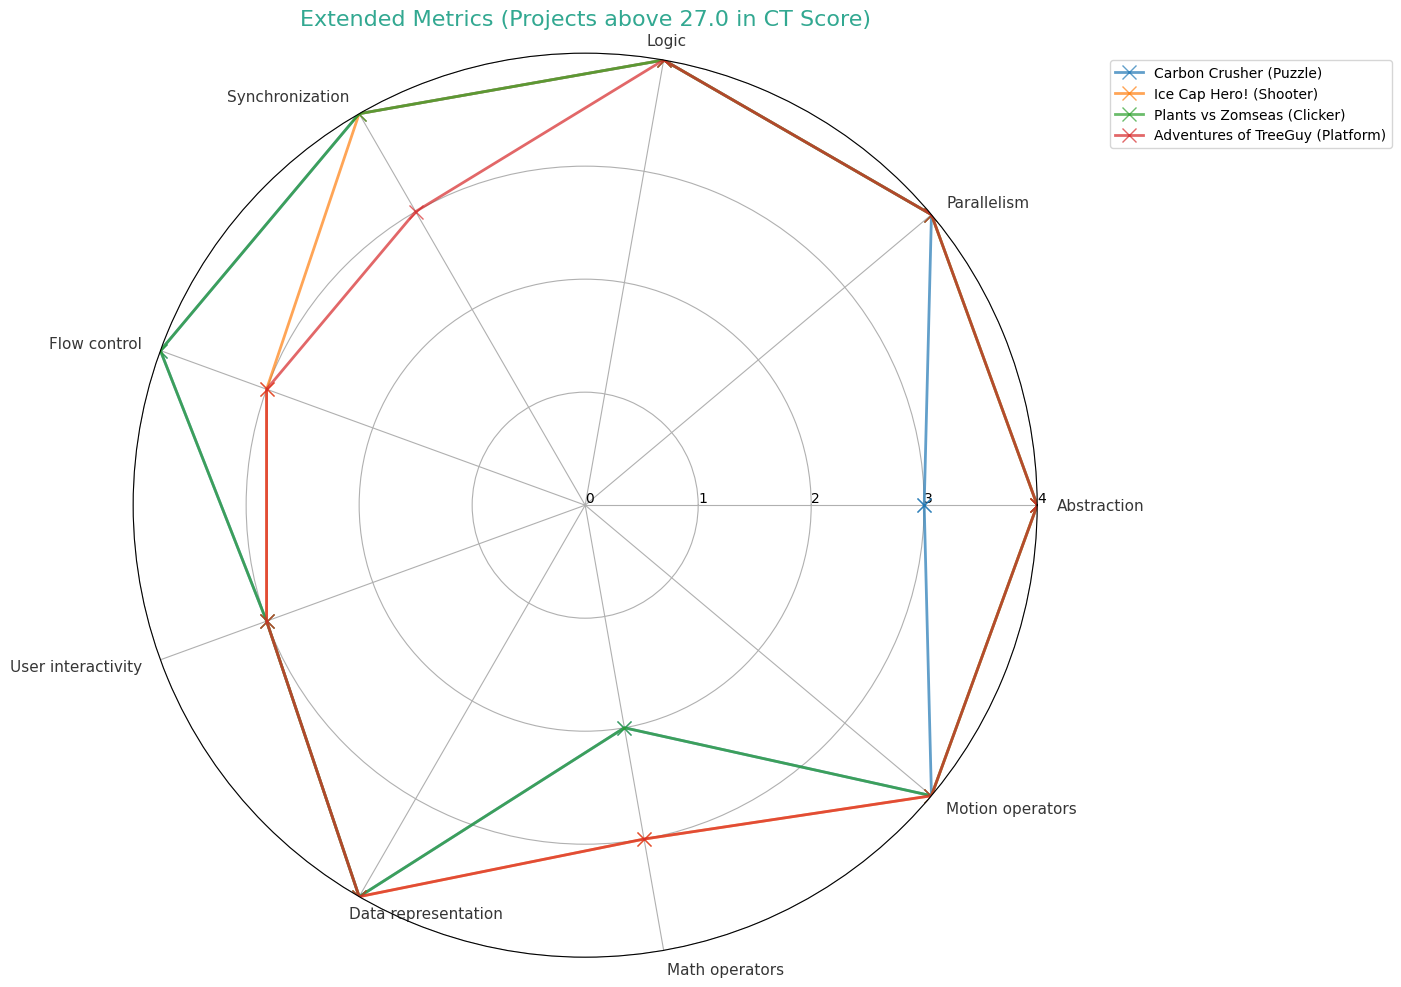

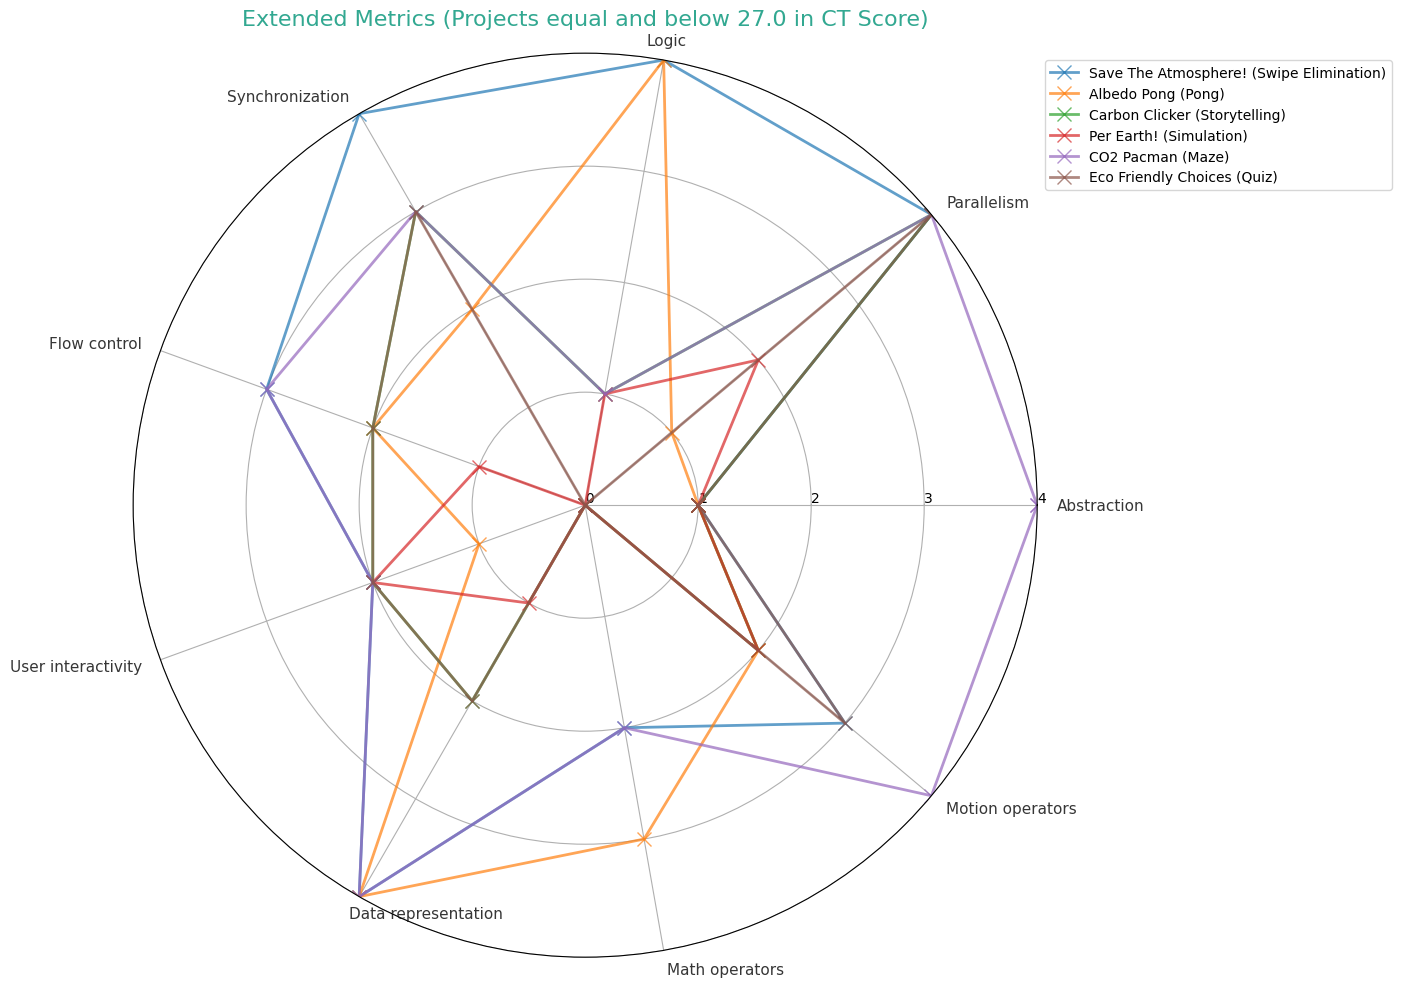

In [203]:
median_new_points = metrics_new['points'].median()
print("Mediana:", median_new_points)

def plot_radar_charts(groups, group_name, pos):
    fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(polar=True))
    
    for name, df in groups.items():
        project_name = df['Name'].tolist()[0]
        dims = df.iloc[:, 6:15]
        dims_names = dims.columns.tolist()
        dim_means = dims.apply(lambda x: x.str.split('/').str[0].astype(float)).mean()
        dim_means = [round(n, 2) for n in dim_means]
        
        # Preparar datos para el gráfico
        num_vars = len(dims_names)
        angles = [n * 2 * np.pi / num_vars for n in range(num_vars)]
        angles += angles[:1]
        dim_means += dim_means[:1]

        # Graficar en el eje polar
        ax.plot(angles, dim_means, linewidth=2, label=f'{project_name} ({name})',markersize=10, marker='x',alpha=0.7)

    # Configuración del diseño
    ax.set_rlabel_position(0)
    ax.set_ylim(0, 4)
    ax.set_yticks(np.arange(0, 5, 1))
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(dims_names, fontsize=11, color='#363636')
    
    for label, angle in zip(ax.get_xticklabels(), angles):
        dim_name = label.get_text()
        if dim_name in ["Parallelism","Abstraction", "Math operators", "Motion operators", "Data representation"]:
            label.set_horizontalalignment('left')
        elif dim_name in ["Synchronization", "Flow control", "User interactivity"]:
            label.set_horizontalalignment('right')

    # Añadir la leyenda y el título
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.title(f'Extended Metrics ({group_name})', fontsize=16, color='#32a891')

    # Ajuste del diseño
    plt.tight_layout()

    # Guardar y mostrar el gráfico
    plt.savefig(f'./figs_new_metrics/group_55/radar_chart_{pos}_mean.png', bbox_inches='tight')
    plt.show()




# Diccionarios para almacenar los grupos
above_median = {}
below_median = {}

# Clasificar los géneros en función de la mediana
for name, df in main_genres_subsets_new.items():
    project_points = df['points'].mean()  # Supongo que cada df tiene una columna 'points'
    if project_points > median_new_points:
        above_median[name] = df
    else:
        below_median[name] = df


# Generar gráficos para los grupos
plot_radar_charts(above_median, f"Projects above {median_new_points} in CT Score", "above")
plot_radar_charts(below_median, f"Projects equal and below {median_new_points} in CT Score", "below")

## AGRUP OLD 3-4-3

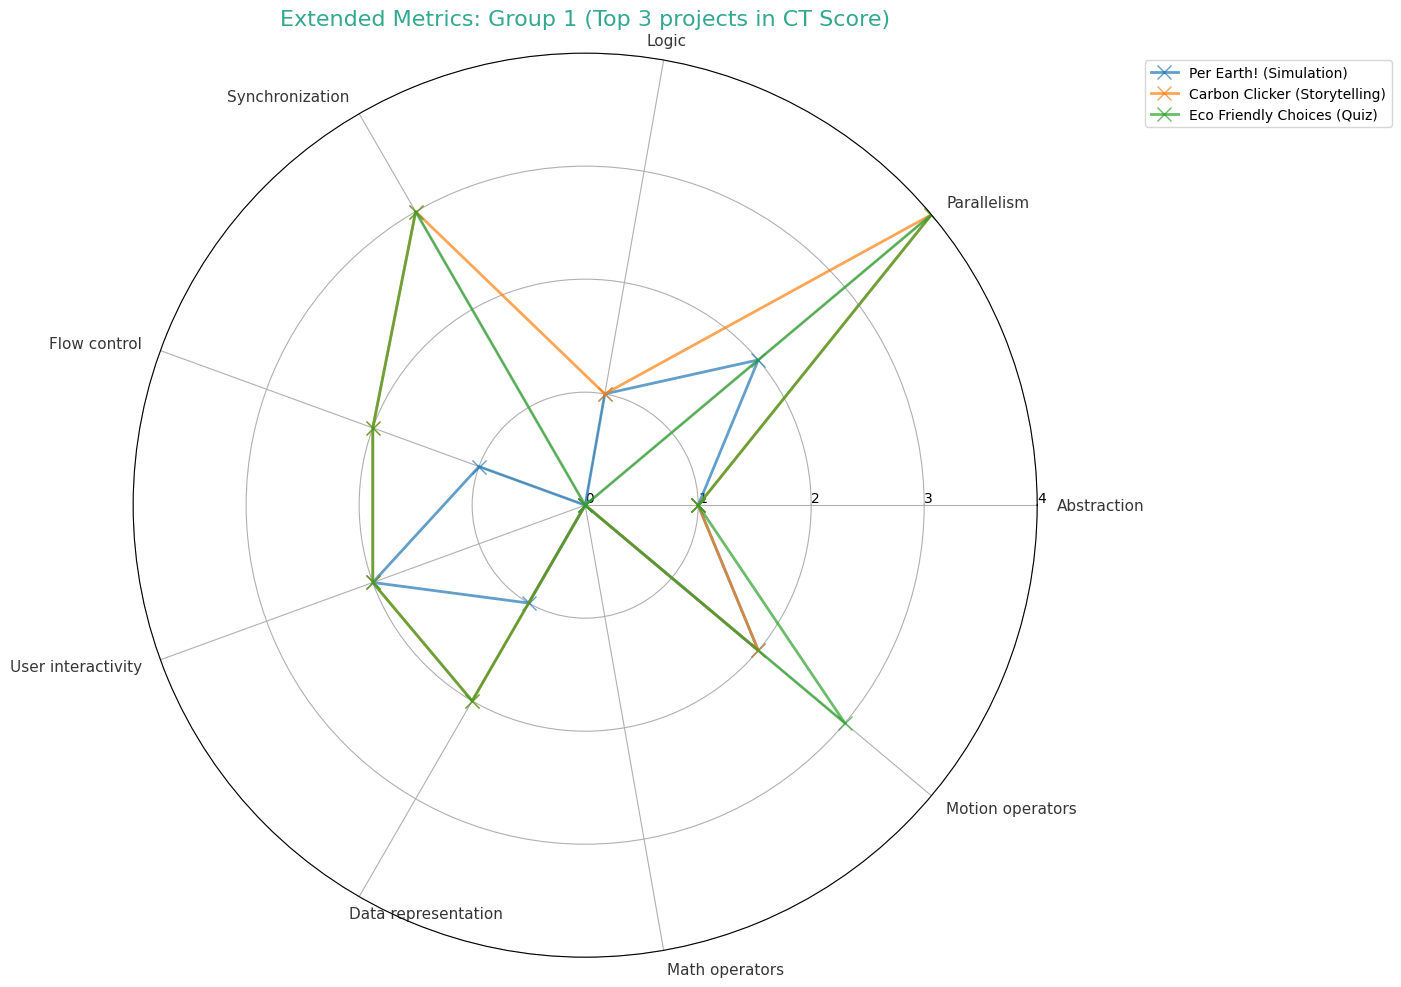

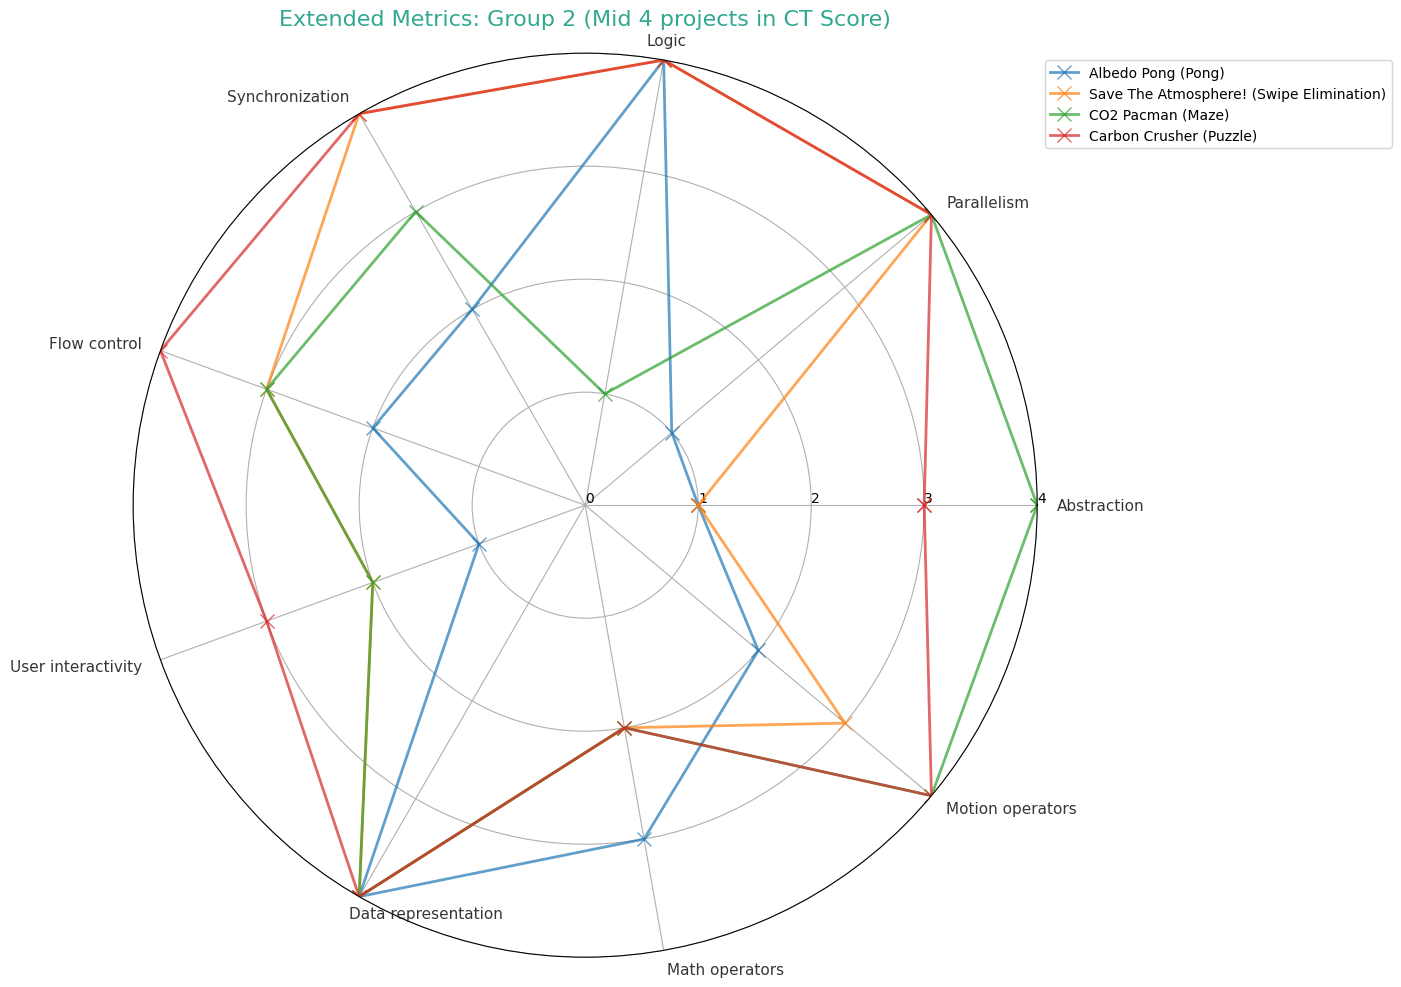

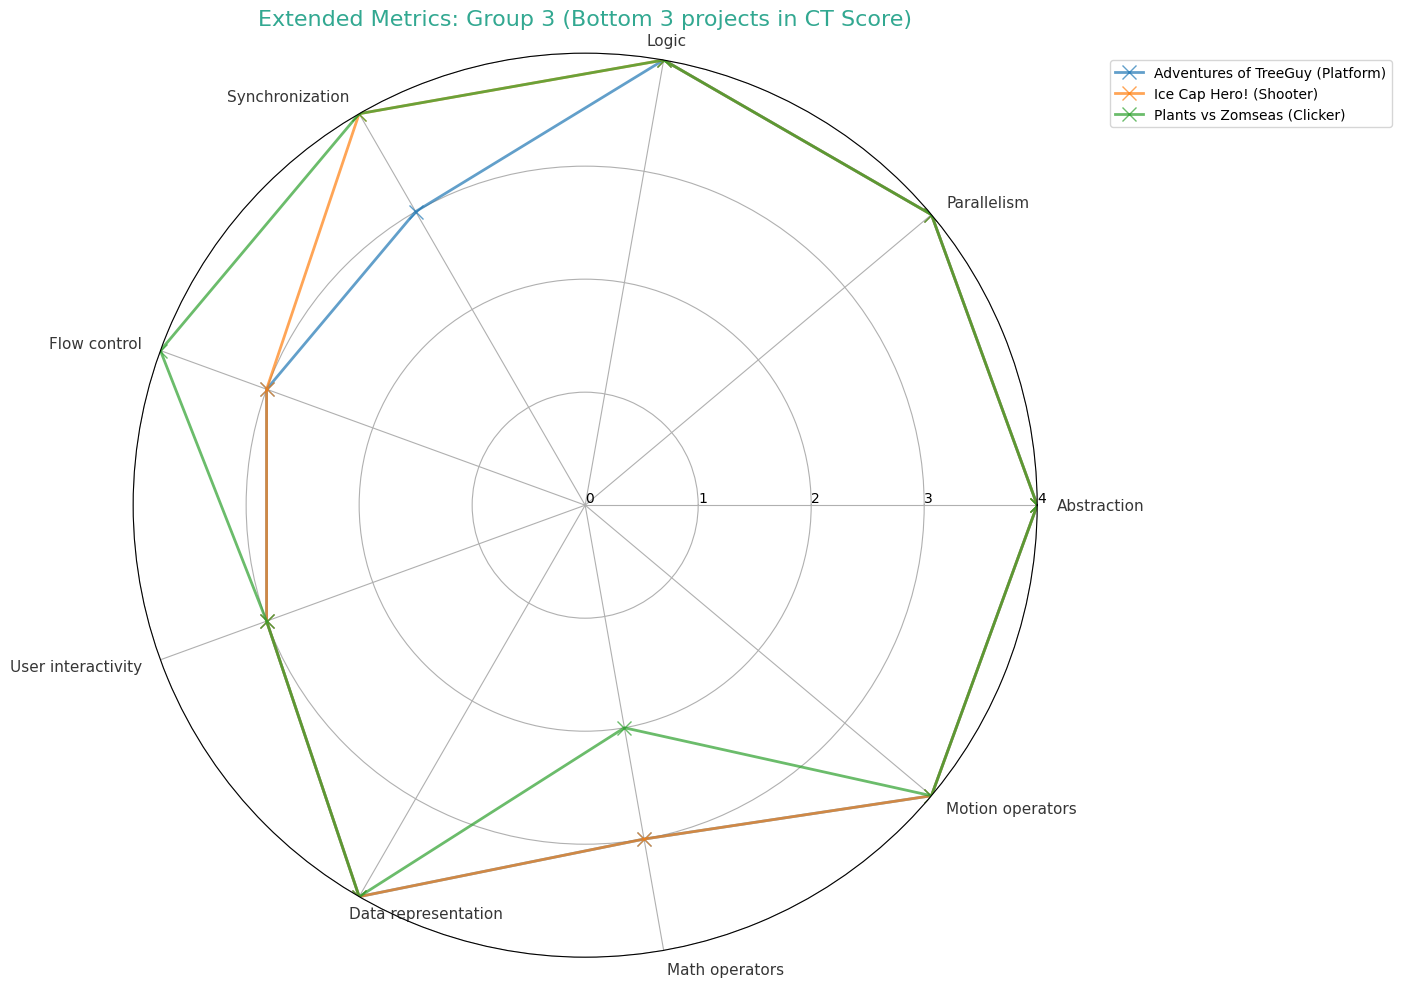

In [204]:
def plot_radar_charts(groups, group_name, pos):
    fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(polar=True))
    
    for name, df in groups.items():
        project_name = df['Name'].tolist()[0]
        dims = df.iloc[:, 6:15]
        dims_names = dims.columns.tolist()
        dim_means = dims.apply(lambda x: x.str.split('/').str[0].astype(float)).mean()
        dim_means = [round(n, 2) for n in dim_means]
        
        # Preparar datos para el gráfico
        num_vars = len(dims_names)
        angles = [n * 2 * np.pi / num_vars for n in range(num_vars)]
        angles += angles[:1]
        dim_means += dim_means[:1]

        # Graficar en el eje polar
        ax.plot(angles, dim_means, linewidth=2, label=f'{project_name} ({name})',markersize=10, marker='x',alpha=0.7)

    # Configuración del diseño
    ax.set_rlabel_position(0)
    ax.set_ylim(0, 4)
    ax.set_yticks(np.arange(0, 5, 1))
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(dims_names, fontsize=11, color='#363636')
    
    for label, angle in zip(ax.get_xticklabels(), angles):
        dim_name = label.get_text()
        if dim_name in ["Parallelism","Abstraction", "Math operators", "Motion operators", "Data representation"]:
            label.set_horizontalalignment('left')
        elif dim_name in ["Synchronization", "Flow control", "User interactivity"]:
            label.set_horizontalalignment('right')

    # Añadir la leyenda y el título
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.title(f'Extended Metrics: {group_name}', fontsize=16, color='#32a891')

    # Ajuste del diseño
    plt.tight_layout()

    # Guardar y mostrar el gráfico
    plt.savefig(f'./figs_new_metrics/group_343/radar_group_{pos}.png', bbox_inches='tight')
    plt.show()





main_genres_subsets_new = dict(sorted(main_genres_subsets_new.items(), key=lambda item: int(item[1]['points'].iloc[0])))
group1 = dict(list(main_genres_subsets_new.items())[:3])
group2 = dict(list(main_genres_subsets_new.items())[3:7])
group3 = dict(list(main_genres_subsets_new.items())[7:])


# Generar gráficos para los grupos
plot_radar_charts(group1, "Group 1 (Top 3 projects in CT Score)", "1")
plot_radar_charts(group2, "Group 2 (Mid 4 projects in CT Score)", "2")
plot_radar_charts(group3, "Group 3 (Bottom 3 projects in CT Score)", "3")

# **OLD METRICS**

## INDIVIDUAL METRICS

Save The Atmosphere!


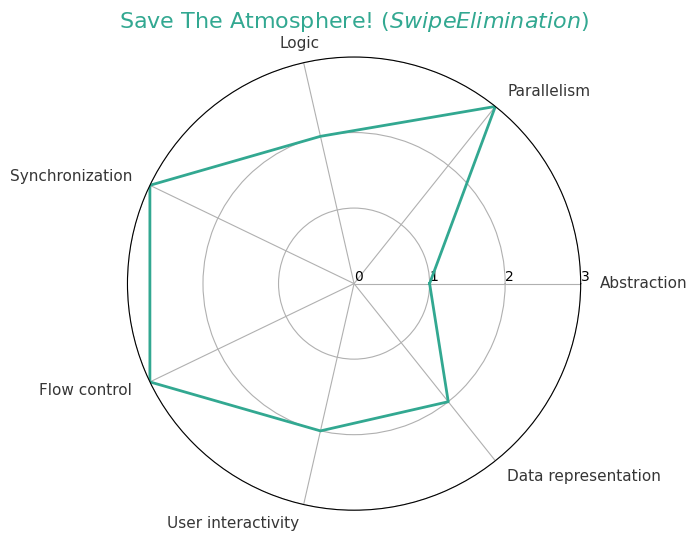

Albedo Pong


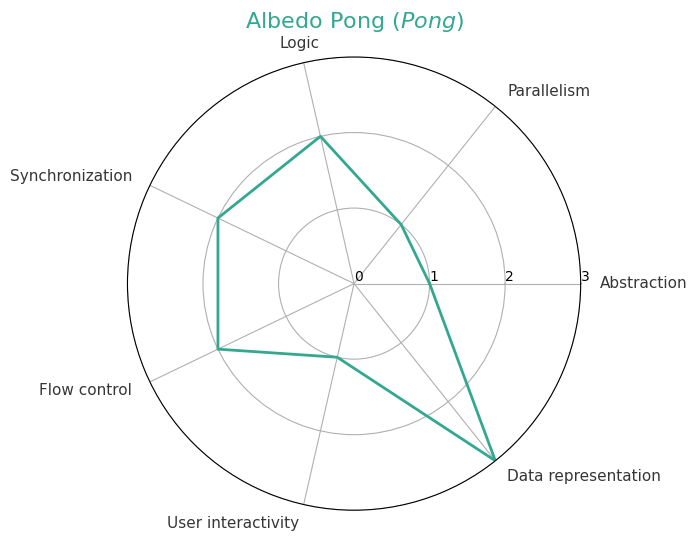

Carbon Crusher


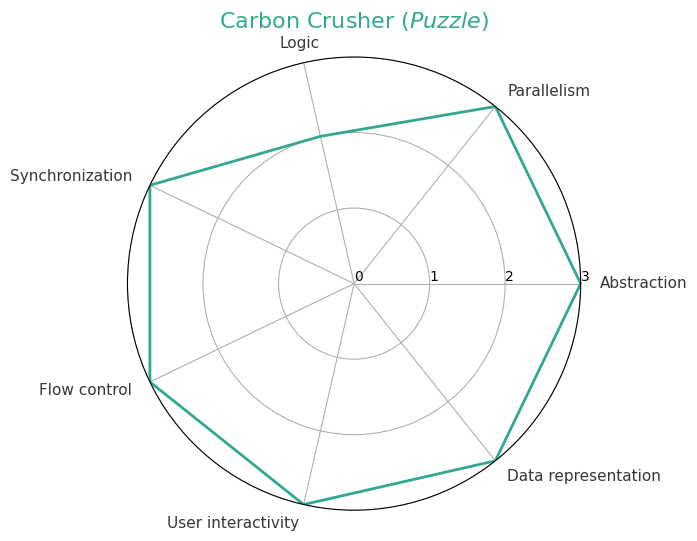

Carbon Clicker


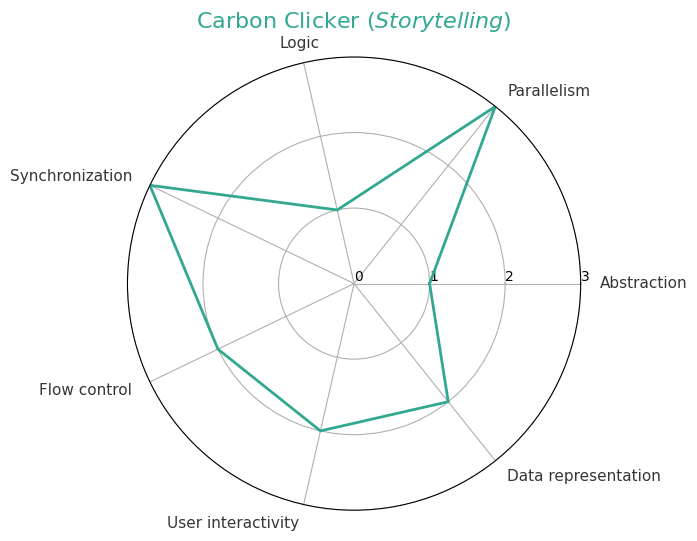

Per Earth!


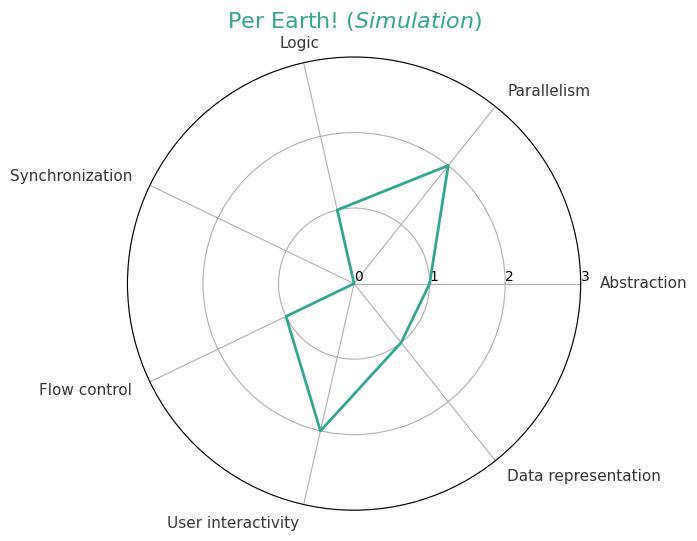

Ice Cap Hero!


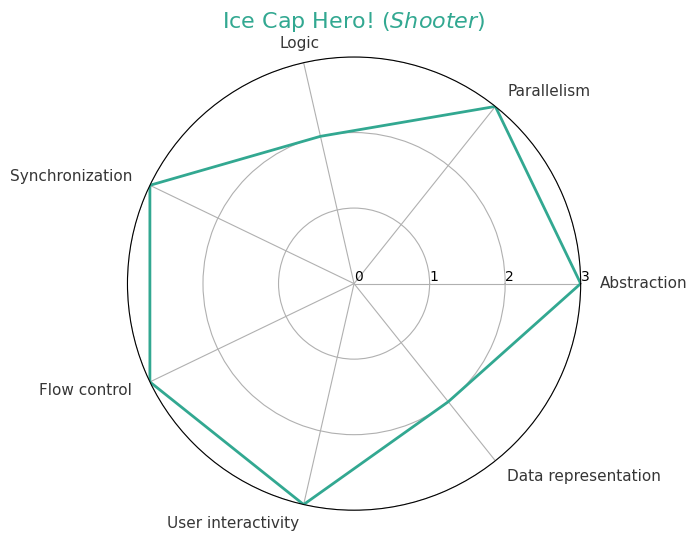

CO2 Pacman


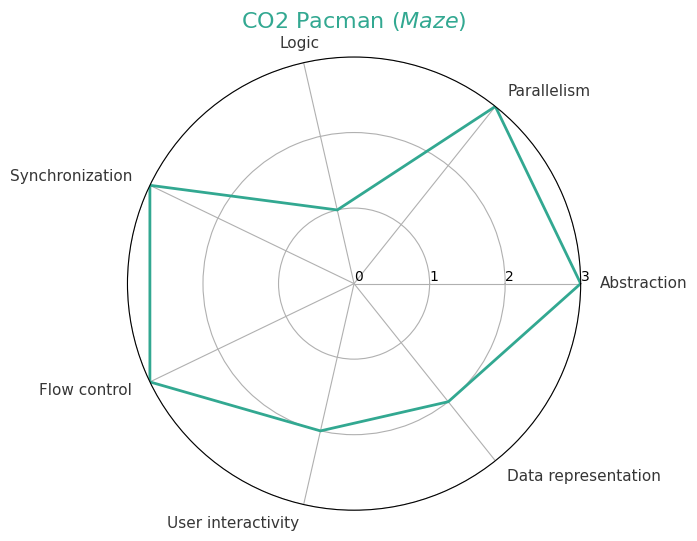

Plants vs Zomseas


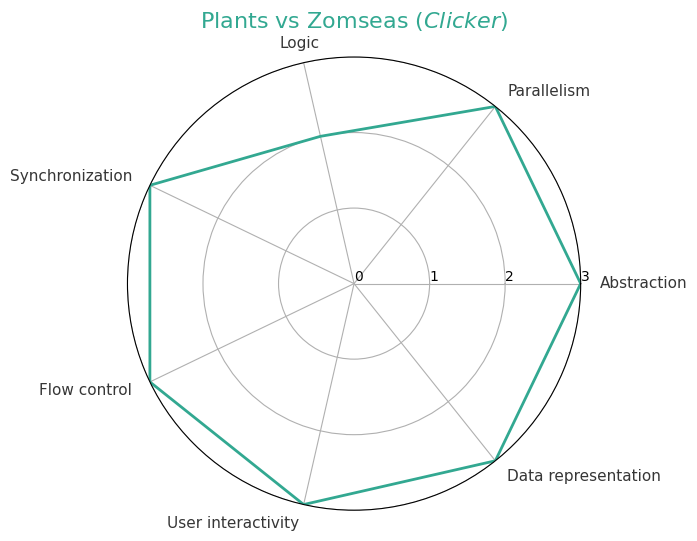

Eco Friendly Choices


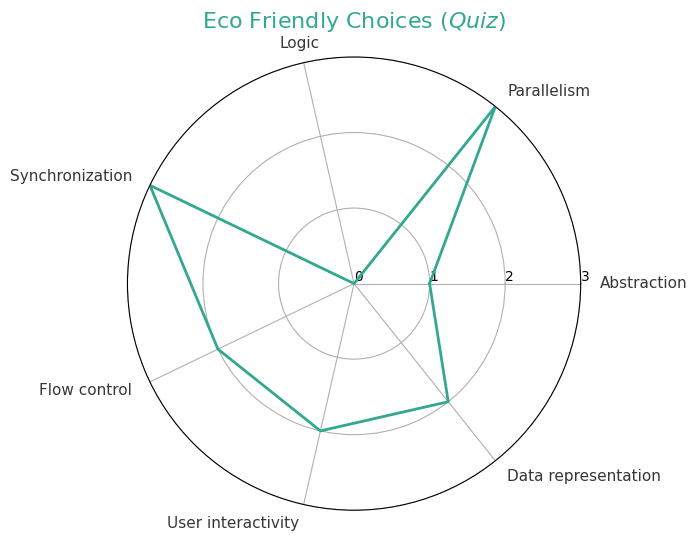

Adventures of TreeGuy


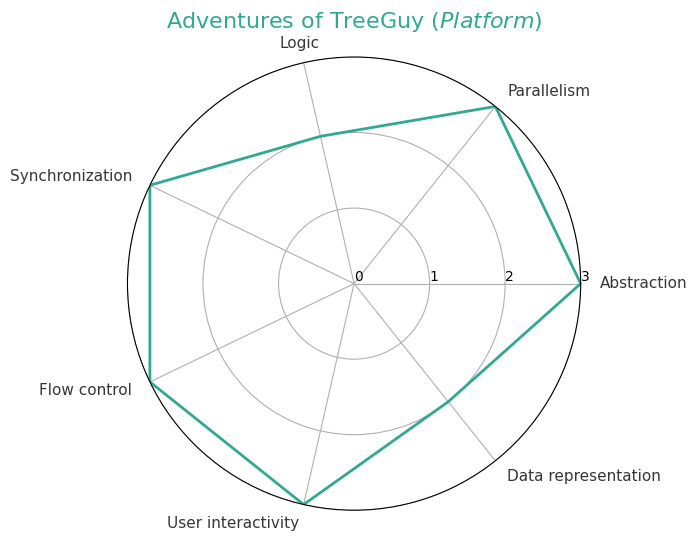

In [205]:
# CHOOSE DATAFRAME
for name, df in main_genres_subsets_old.items():
    # DATA PREPROCESSING
    project_name = df['Name'].tolist()[0]
    print(project_name)
    dims = df.iloc[:, 6:15]
    dims_names = dims.columns.tolist()
    dim_means = dims.apply(lambda x: x.str.split('/').str[0].astype(float)).mean()
    dim_means = [round(n,2) for n in dim_means]
    
    # ADAPTIONS TO GRAPH NAMES
    cat = dims_names
    val = dim_means
    
    # GRAPH
    num_vars = len(cat)
    angles = [n * 2 * np.pi / num_vars for n in range(num_vars)]
    angles += angles[:1]
    val += val[:1]
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    ax.plot(angles, val, color='#32a891', linewidth=2)  
    ax.set_rlabel_position(0)  
    
    # DESIGN
    ax.set_ylim(0, 3) 
    ax.set_yticks(np.arange(0, 4, 1))
    plt.title(f'{project_name} ($\\it{{{name}}}$)', fontsize=16, color='#32a891')
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(dims, fontsize=11, color='#363636')
    for label, angle in zip(ax.get_xticklabels(), angles):
        dim_name = label.get_text()
        if dim_name in ["Parallelism","Abstraction", "Math operators", "Motion operators", "Data representation"]:
            label.set_horizontalalignment('left')
        elif dim_name in ["Synchronization", "Flow control", "User interactivity"]:
            label.set_horizontalalignment('right')
   

    
    # ADJUST DESIGN
    plt.tight_layout()

    plt.savefig(f'./figs_old_metrics/individual_metrics/{name}.png', bbox_inches='tight')
    # SHOW GRAPH
    plt.show()

## ALL TOGETHER

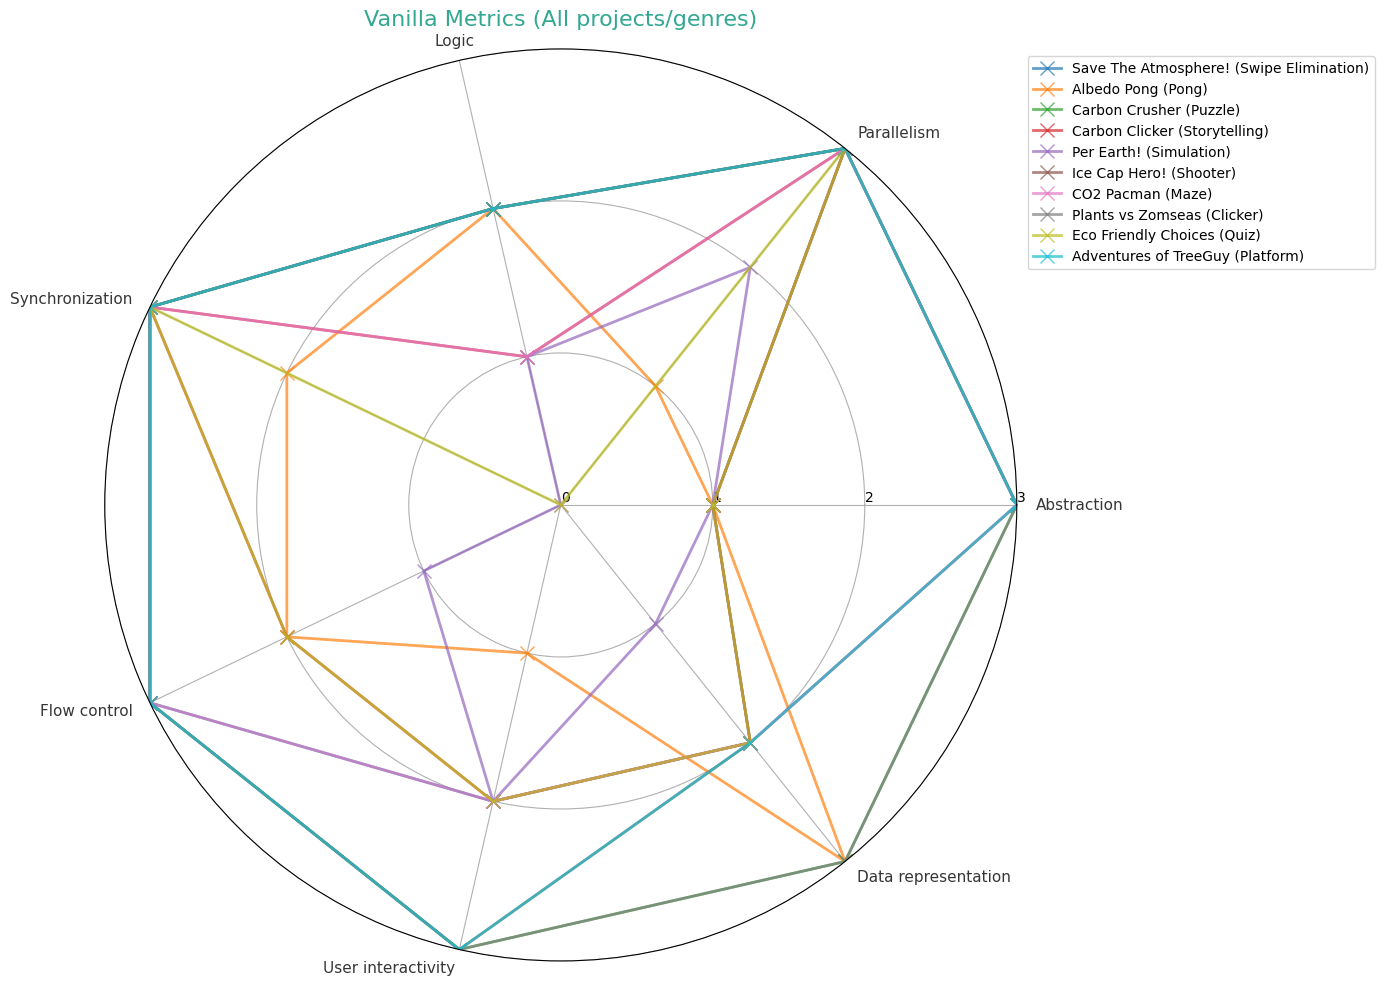

In [206]:
import numpy as np
import matplotlib.pyplot as plt

# Crear la figura y el eje polar
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(polar=True))

# Iterar sobre cada subconjunto en el diccionario `main_genres_subsets_old`
for name, df in main_genres_subsets_old.items():
    # Procesamiento de datos
    project_name = df['Name'].tolist()[0]
    dims = df.iloc[:, 6:15]
    dims_names = dims.columns.tolist()
    dim_means = dims.apply(lambda x: x.str.split('/').str[0].astype(float)).mean()
    dim_means = [round(n, 2) for n in dim_means]
    
    # Preparar datos para el gráfico
    num_vars = len(dims_names)
    angles = [n * 2 * np.pi / num_vars for n in range(num_vars)]
    angles += angles[:1]
    dim_means += dim_means[:1]

    # Graficar en el eje polar
    ax.plot(angles, dim_means, linewidth=2, label=f'{project_name} ({name})',markersize=10, marker='x',alpha=0.7)

# Configuración del diseño
ax.set_rlabel_position(0)  
ax.set_ylim(0, 3)
ax.set_yticks(np.arange(0, 4, 1))

# Adaptación de nombres de las dimensiones
ax.set_xticks(angles[:-1])
ax.set_xticklabels(dims_names, fontsize=11, color='#363636')
for label, angle in zip(ax.get_xticklabels(), angles):
    dim_name = label.get_text()
    if dim_name in ["Parallelism","Abstraction", "Math operators", "Motion operators", "Data representation"]:
        label.set_horizontalalignment('left')
    elif dim_name in ["Synchronization", "Flow control", "User interactivity"]:
        label.set_horizontalalignment('right')

# Añadir la leyenda y el título
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.title('Vanilla Metrics (All projects/genres)', fontsize=16, color='#32a891')

# Ajuste del diseño
plt.tight_layout()

# Guardar y mostrar el gráfico
plt.savefig('./figs_old_metrics/all_together_metrics/comparative_radar_chart.png', bbox_inches='tight')
plt.show()


## AGRUP OLD METRICS 5-5

Mediana: 16.5


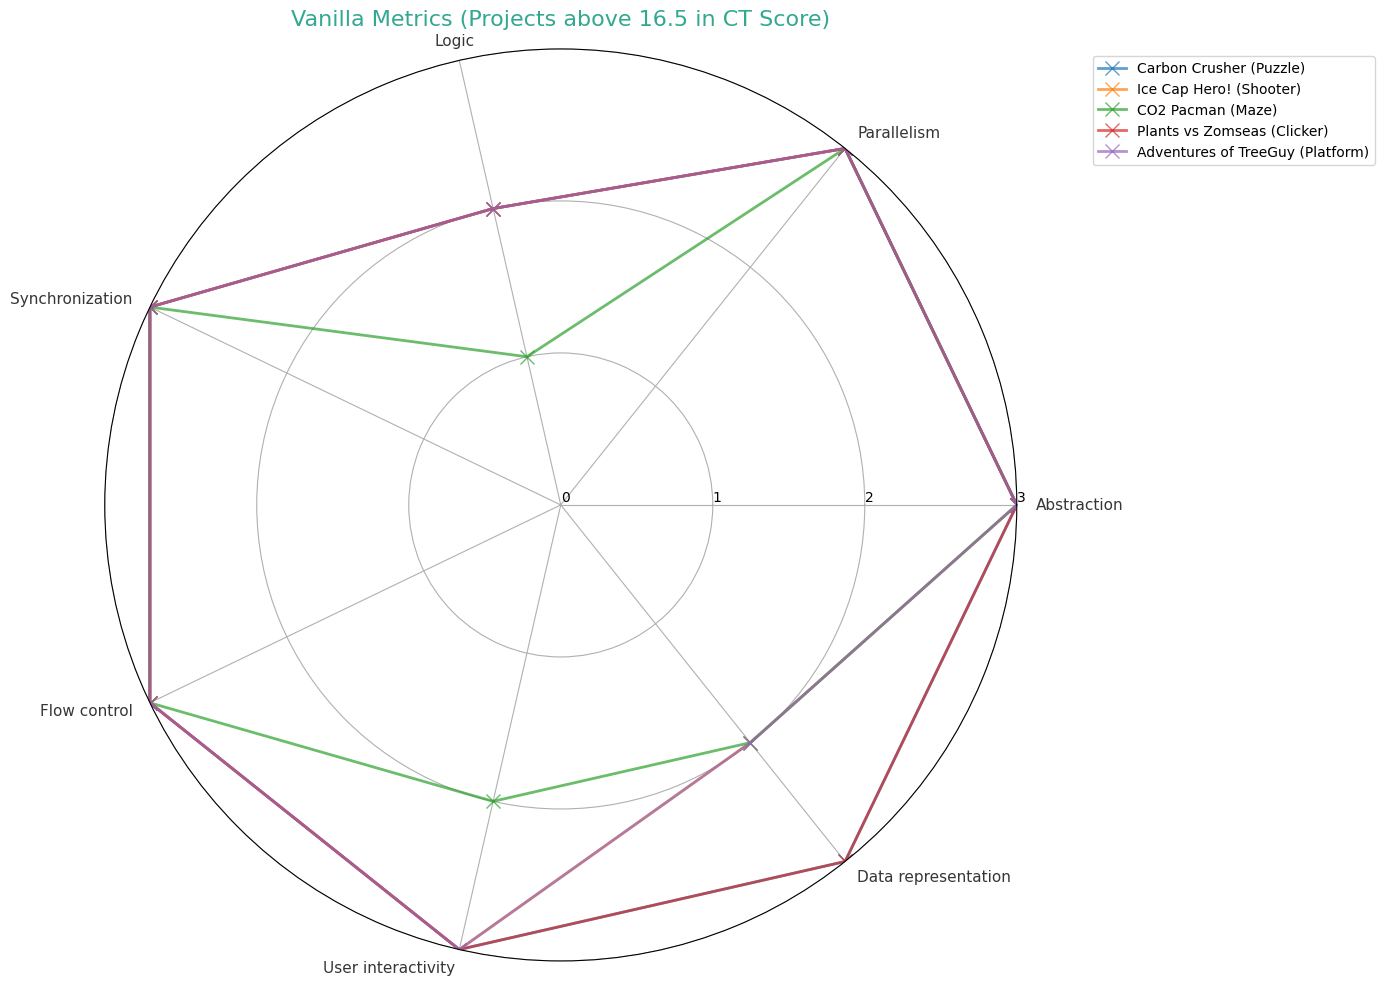

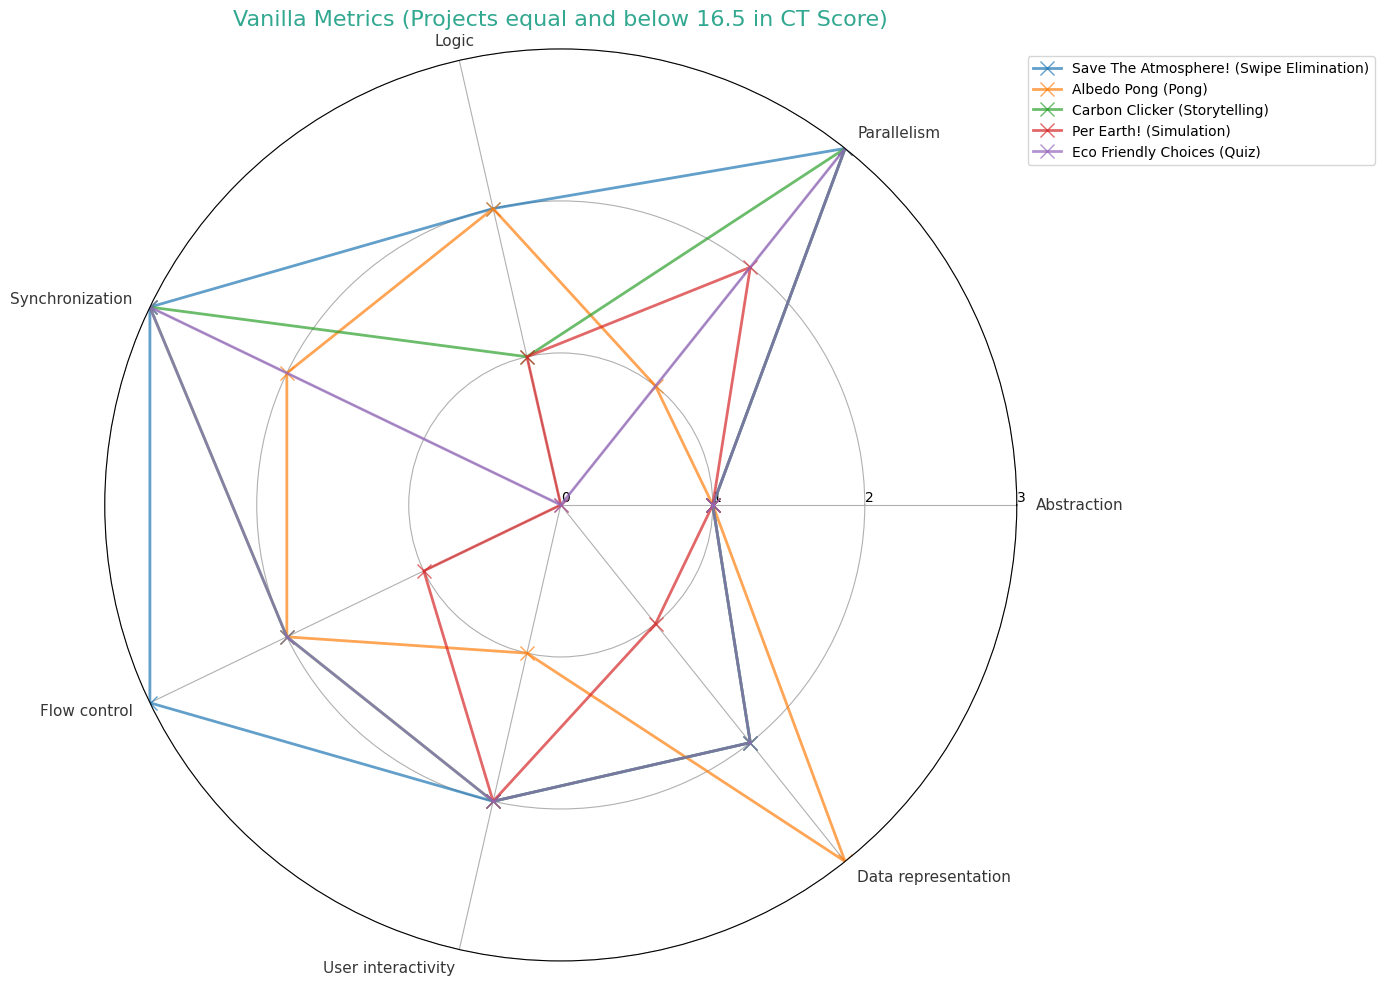

In [207]:
median_old_points = metrics_old['points'].median()
print("Mediana:", median_old_points)

def plot_radar_charts(groups, group_name, pos):
    fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(polar=True))
    
    for name, df in groups.items():
        project_name = df['Name'].tolist()[0]
        dims = df.iloc[:, 6:15]
        dims_names = dims.columns.tolist()
        dim_means = dims.apply(lambda x: x.str.split('/').str[0].astype(float)).mean()
        dim_means = [round(n, 2) for n in dim_means]
        
        # Preparar datos para el gráfico
        num_vars = len(dims_names)
        angles = [n * 2 * np.pi / num_vars for n in range(num_vars)]
        angles += angles[:1]
        dim_means += dim_means[:1]

        # Graficar en el eje polar
        ax.plot(angles, dim_means, linewidth=2, label=f'{project_name} ({name})',markersize=10, marker='x',alpha=0.7)

    # Configuración del diseño
    ax.set_rlabel_position(0)
    ax.set_ylim(0, 3)
    ax.set_yticks(np.arange(0, 4, 1))
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(dims_names, fontsize=11, color='#363636')
    
    for label, angle in zip(ax.get_xticklabels(), angles):
        dim_name = label.get_text()
        if dim_name in ["Parallelism","Abstraction", "Math operators", "Motion operators", "Data representation"]:
            label.set_horizontalalignment('left')
        elif dim_name in ["Synchronization", "Flow control", "User interactivity"]:
            label.set_horizontalalignment('right')

    # Añadir la leyenda y el título
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.title(f'Vanilla Metrics ({group_name})', fontsize=16, color='#32a891')

    # Ajuste del diseño
    plt.tight_layout()

    # Guardar y mostrar el gráfico
    plt.savefig(f'./figs_old_metrics/group_55/radar_chart_{pos}_mean.png', bbox_inches='tight')
    plt.show()




# Diccionarios para almacenar los grupos
above_median = {}
below_median = {}

# Clasificar los géneros en función de la mediana
for name, df in main_genres_subsets_old.items():
    project_points = df['points'].mean()  # Supongo que cada df tiene una columna 'points'
    if project_points > median_old_points:
        above_median[name] = df
    else:
        below_median[name] = df


# Generar gráficos para los grupos
plot_radar_charts(above_median, f"Projects above {median_old_points} in CT Score", "above")
plot_radar_charts(below_median, f"Projects equal and below {median_old_points} in CT Score", "below")


## AGRUP OLD 3-4-3

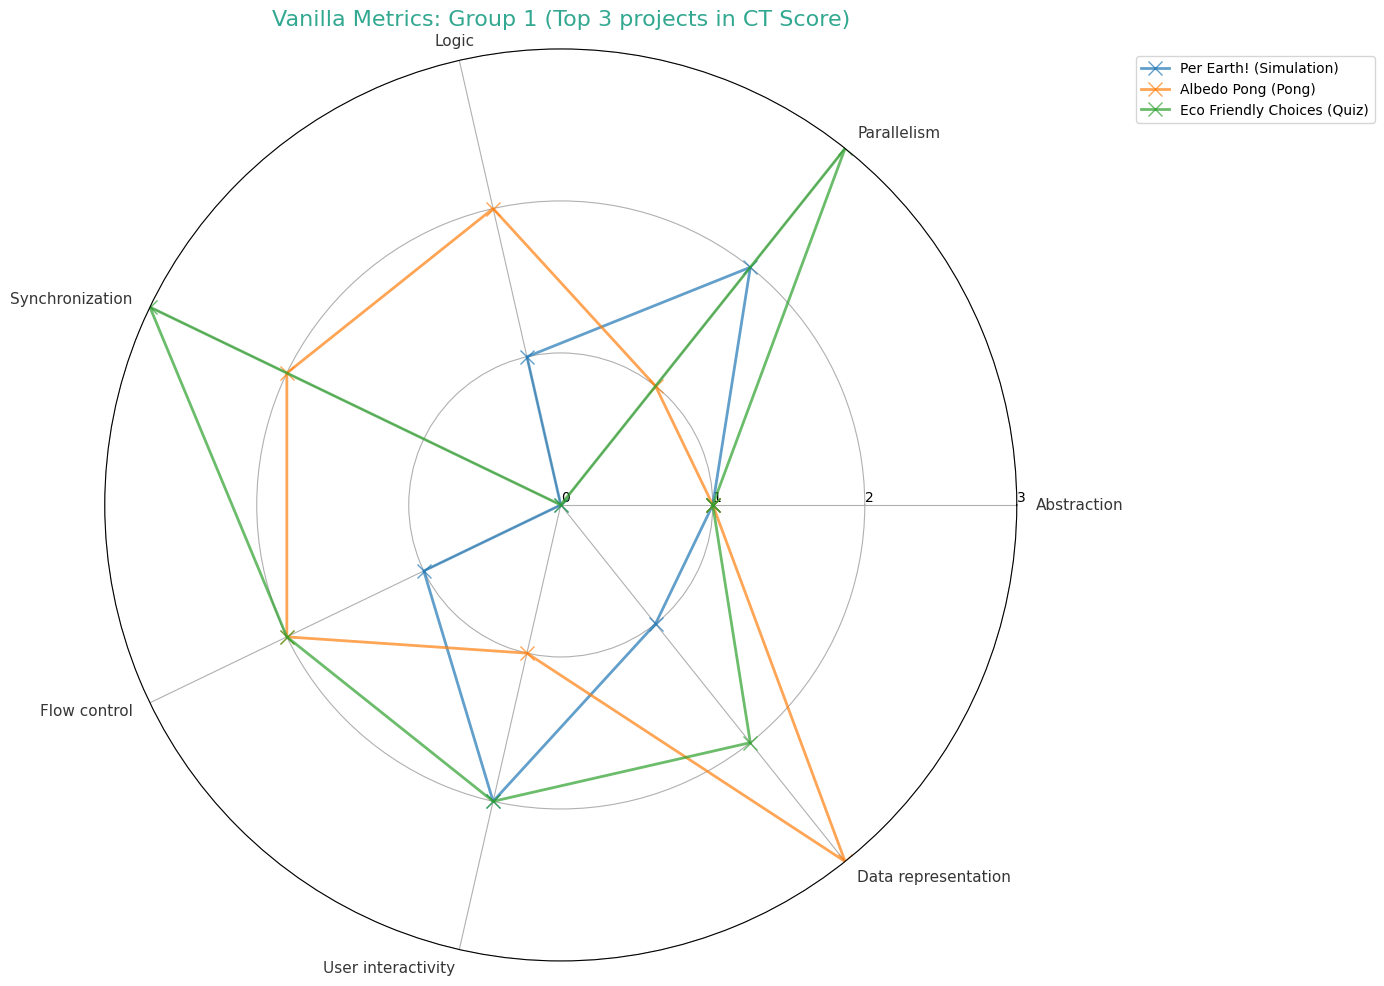

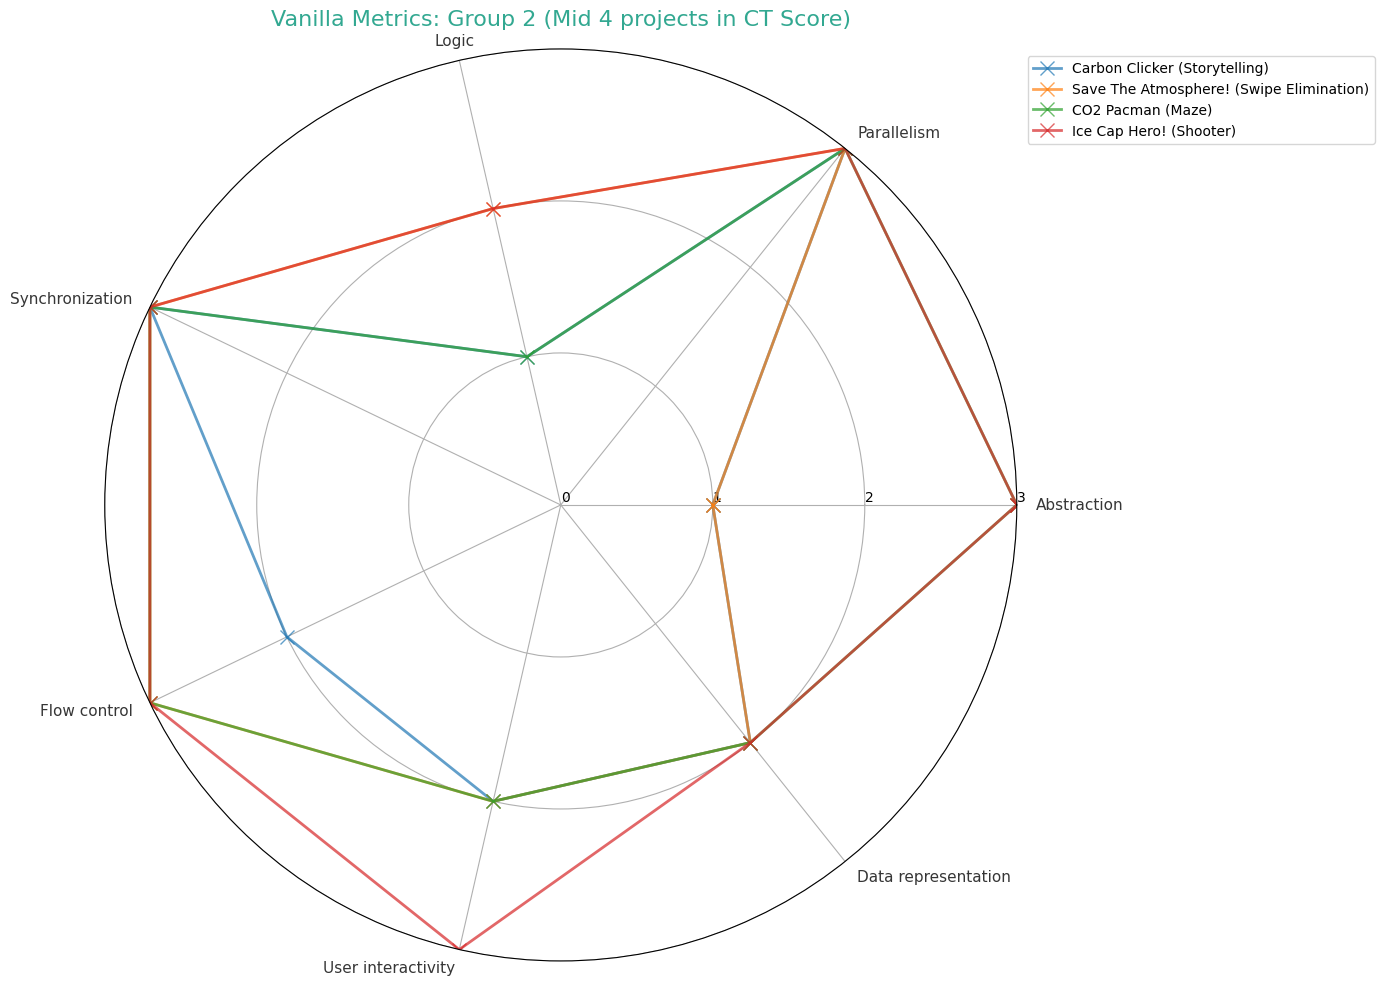

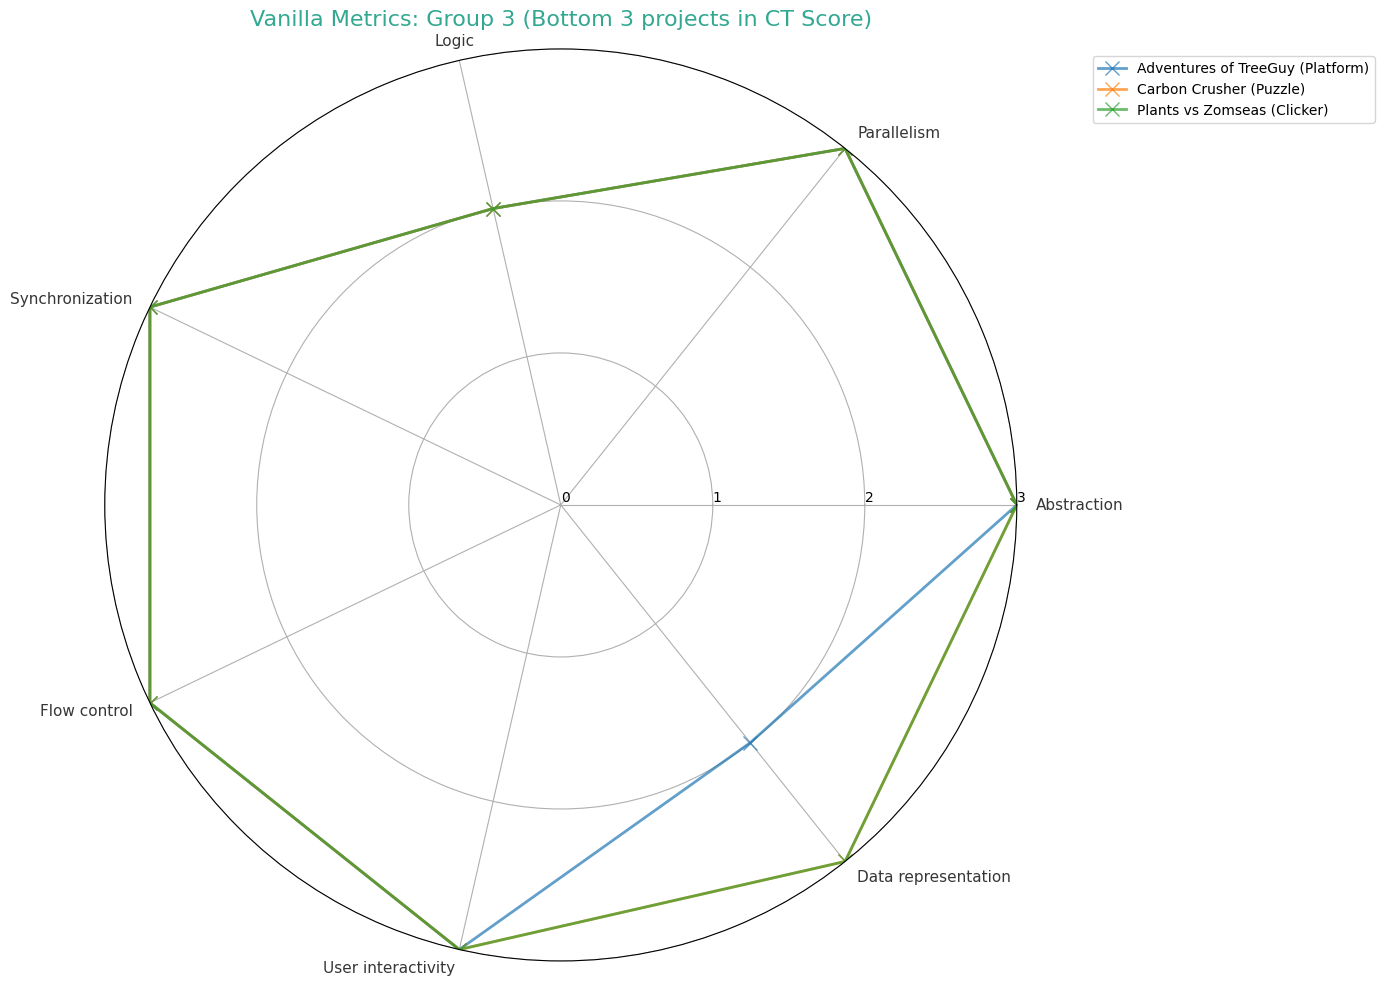

In [208]:
def plot_radar_charts(groups, group_name, pos):
    fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(polar=True))
    
    for name, df in groups.items():
        project_name = df['Name'].tolist()[0]
        dims = df.iloc[:, 6:15]
        dims_names = dims.columns.tolist()
        dim_means = dims.apply(lambda x: x.str.split('/').str[0].astype(float)).mean()
        dim_means = [round(n, 2) for n in dim_means]
        
        # Preparar datos para el gráfico
        num_vars = len(dims_names)
        angles = [n * 2 * np.pi / num_vars for n in range(num_vars)]
        angles += angles[:1]
        dim_means += dim_means[:1]

        # Graficar en el eje polar
        ax.plot(angles, dim_means, linewidth=2, label=f'{project_name} ({name})',markersize=10, marker='x',alpha=0.7)

    # Configuración del diseño
    ax.set_rlabel_position(0)
    ax.set_ylim(0, 3)
    ax.set_yticks(np.arange(0, 4, 1))
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(dims_names, fontsize=11, color='#363636')
    
    for label, angle in zip(ax.get_xticklabels(), angles):
        dim_name = label.get_text()
        if dim_name in ["Parallelism","Abstraction", "Math operators", "Motion operators", "Data representation"]:
            label.set_horizontalalignment('left')
        elif dim_name in ["Synchronization", "Flow control", "User interactivity"]:
            label.set_horizontalalignment('right')

    # Añadir la leyenda y el título
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.title(f'Vanilla Metrics: {group_name}', fontsize=16, color='#32a891')

    # Ajuste del diseño
    plt.tight_layout()

    # Guardar y mostrar el gráfico
    plt.savefig(f'./figs_old_metrics/group_343/radar_group_{pos}.png', bbox_inches='tight')
    plt.show()





main_genres_subsets_old = dict(sorted(main_genres_subsets_old.items(), key=lambda item: int(item[1]['points'].iloc[0])))
group1 = dict(list(main_genres_subsets_old.items())[:3])
group2 = dict(list(main_genres_subsets_old.items())[3:7])
group3 = dict(list(main_genres_subsets_old.items())[7:])


# Generar gráficos para los grupos
plot_radar_charts(group1, "Group 1 (Top 3 projects in CT Score)", "1")
plot_radar_charts(group2, "Group 2 (Mid 4 projects in CT Score)", "2")
plot_radar_charts(group3, "Group 3 (Bottom 3 projects in CT Score)", "3")


In [209]:
type(main_genres_subsets_old)
for item, _ in main_genres_subsets_old.items():
    print(int(_['points'].iloc[0]))

main_genres_subsets_old = dict(sorted(main_genres_subsets_old.items(), key=lambda item: int(item[1]['points'].iloc[0])))
print("-----")
print("OLD SCORES----------------------------")
for item, _ in main_genres_subsets_old.items():
    print(item,int(_['points'].iloc[0]))
print("NEW SCORES----------------------------")
for item, _ in main_genres_subsets_new.items():
    print(item,int(_['points'].iloc[0]))

8
12
13
14
16
17
19
19
20
20
-----
OLD SCORES----------------------------
Simulation 8
Pong 12
Quiz 13
Storytelling 14
Swipe Elimination 16
Maze 17
Shooter 19
Platform 19
Puzzle 20
Clicker 20
NEW SCORES----------------------------
Simulation 10
Storytelling 17
Quiz 17
Pong 20
Swipe Elimination 27
Maze 27
Puzzle 32
Platform 32
Shooter 33
Clicker 33


# VANILLA AND EXTENDED IN SINGLE GRAPHG

[10, 10, 10, 10, 10, 10, 10, 0, 0, 0]


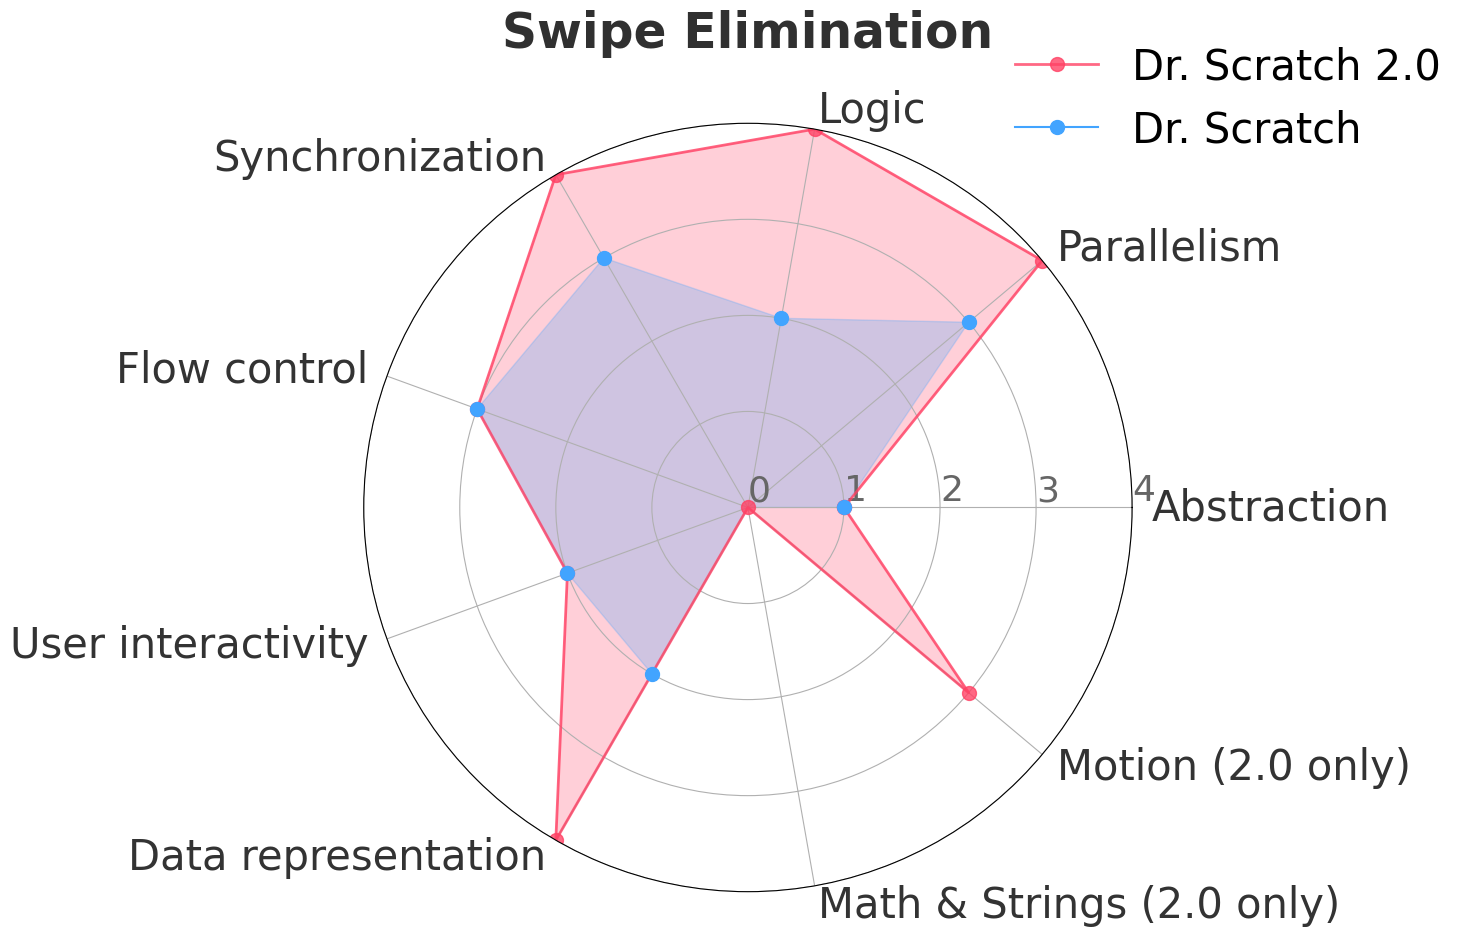

[10, 10, 10, 10, 10, 10, 10, 0, 0, 0]


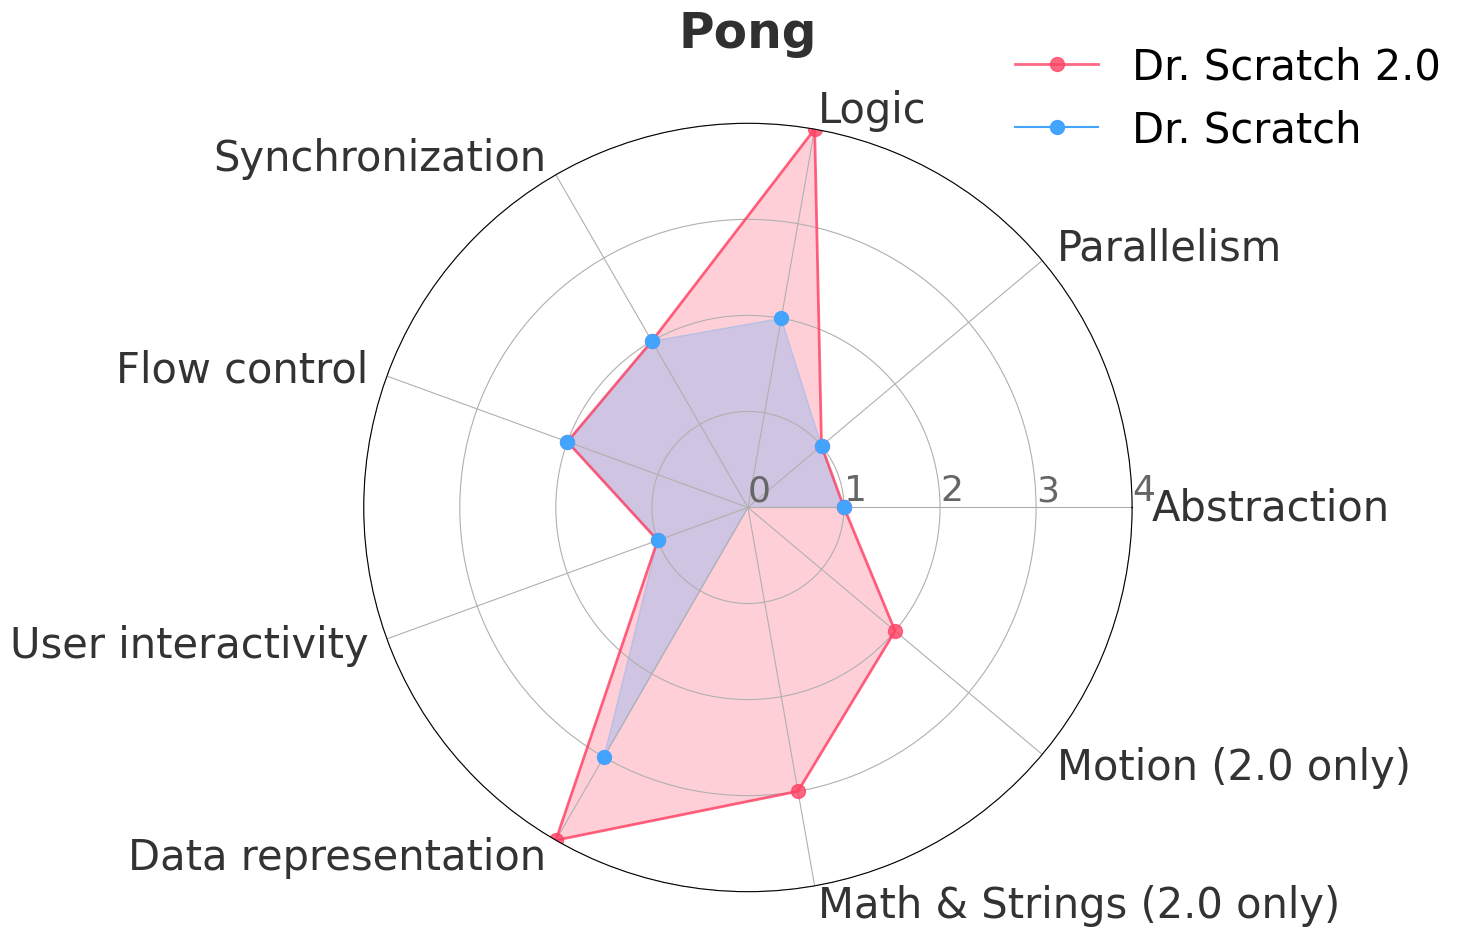

[10, 10, 10, 10, 10, 10, 10, 0, 0, 0]


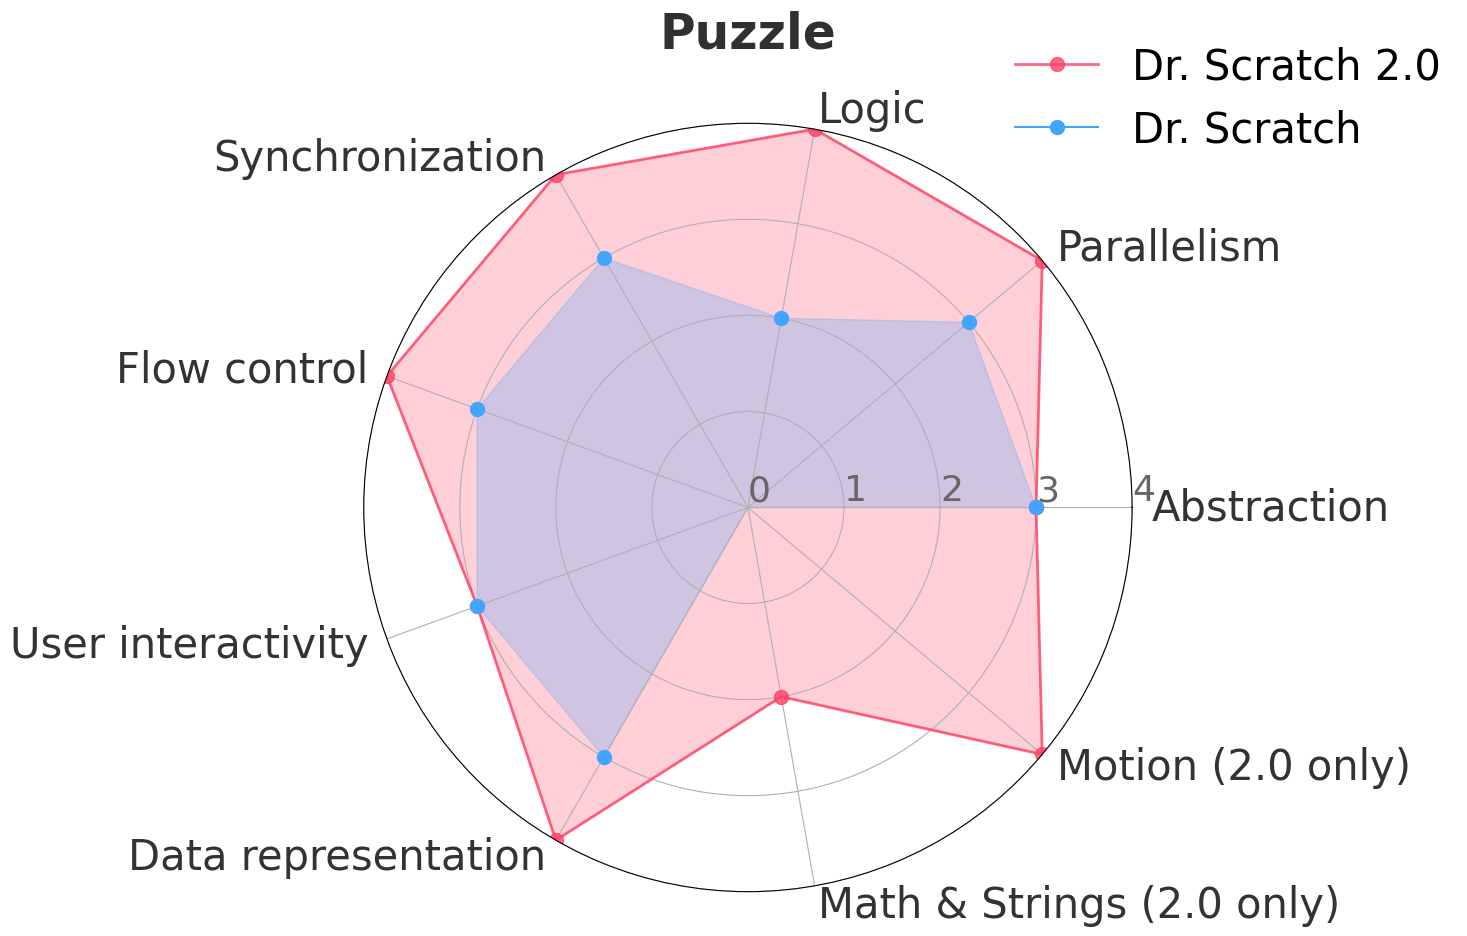

[10, 10, 10, 10, 10, 10, 10, 0, 0, 0]


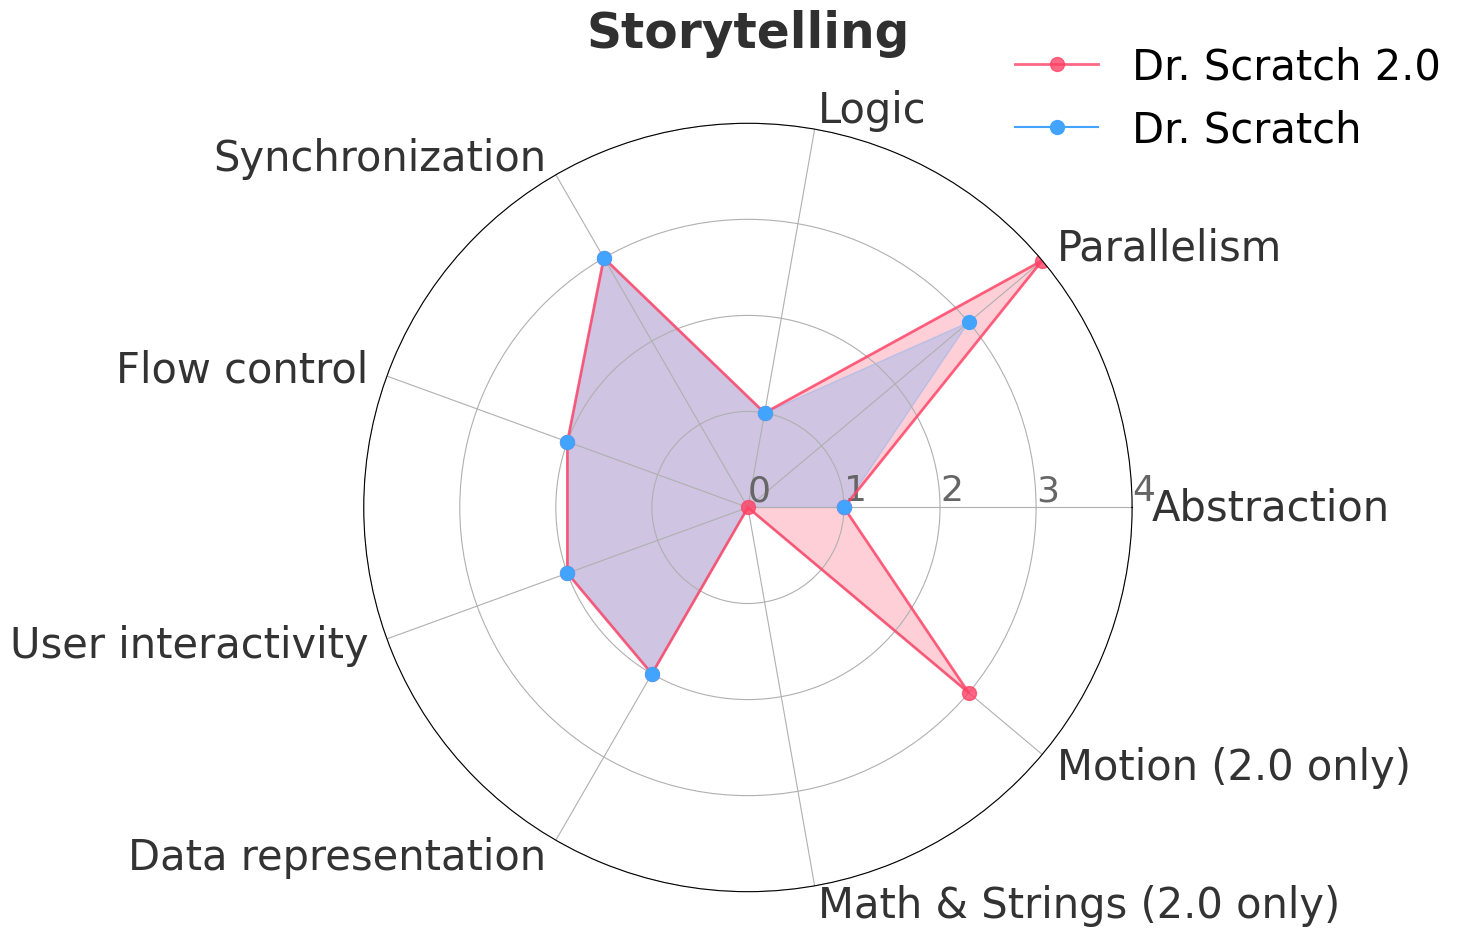

[10, 10, 10, 10, 10, 10, 10, 0, 0, 0]


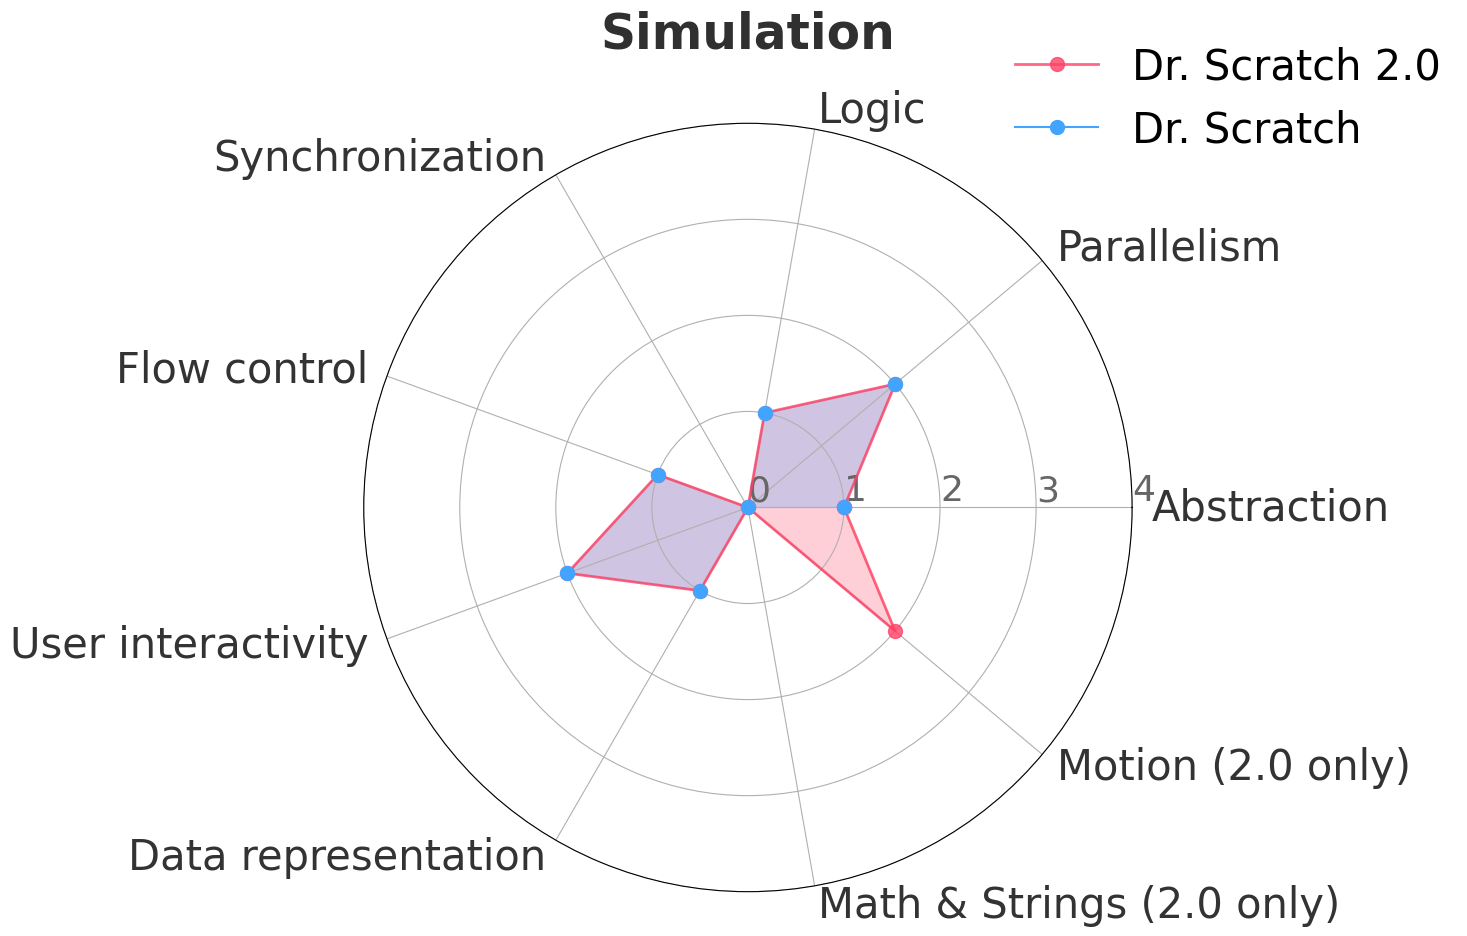

[10, 10, 10, 10, 10, 10, 10, 0, 0, 0]


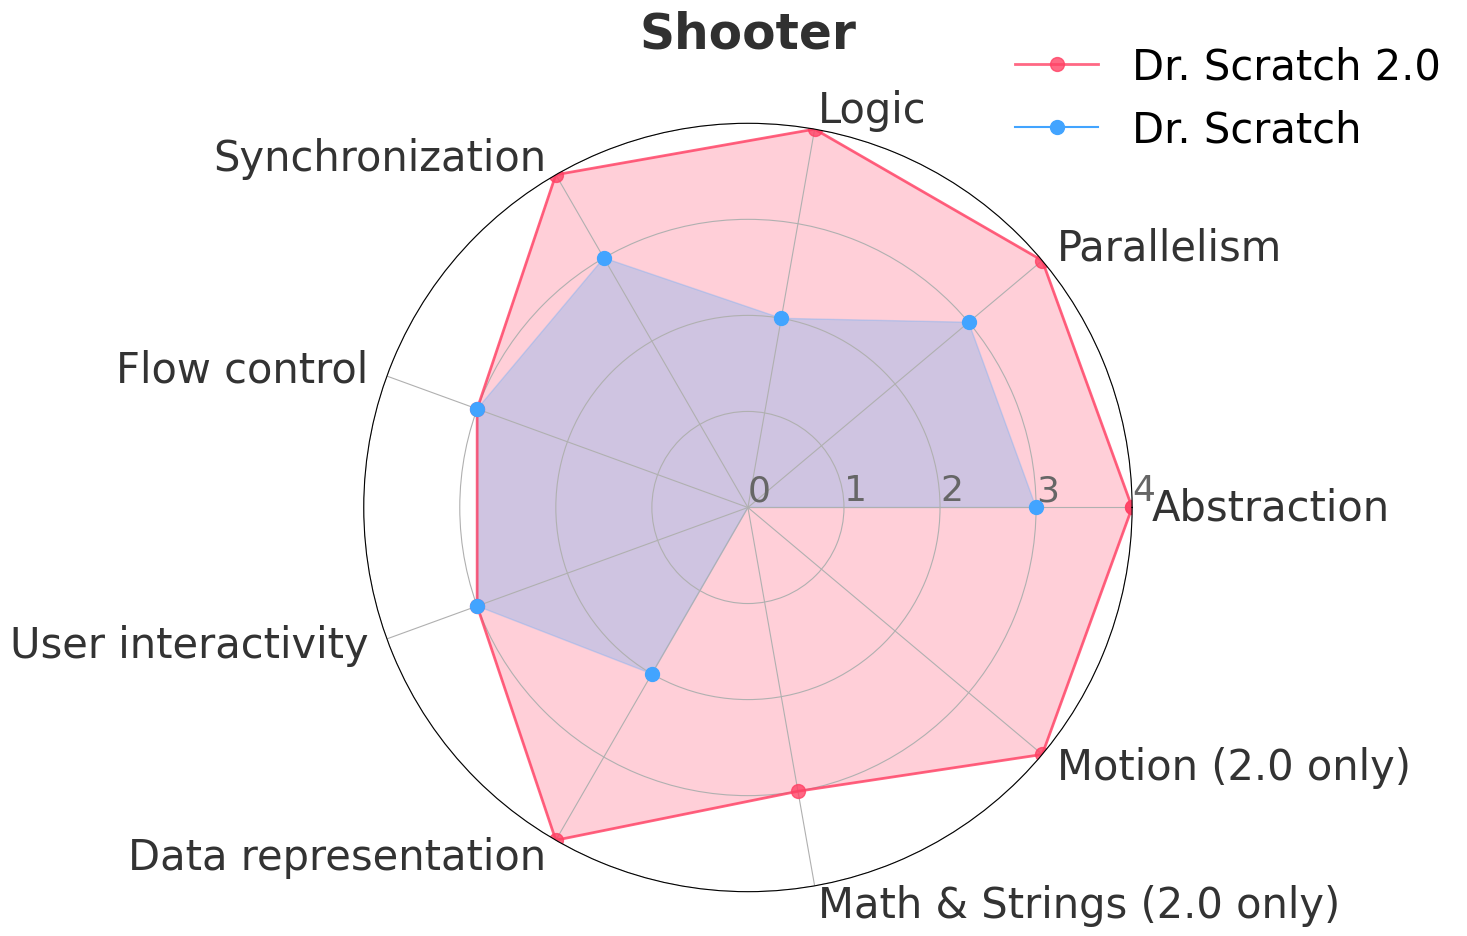

[10, 10, 10, 10, 10, 10, 10, 0, 0, 0]


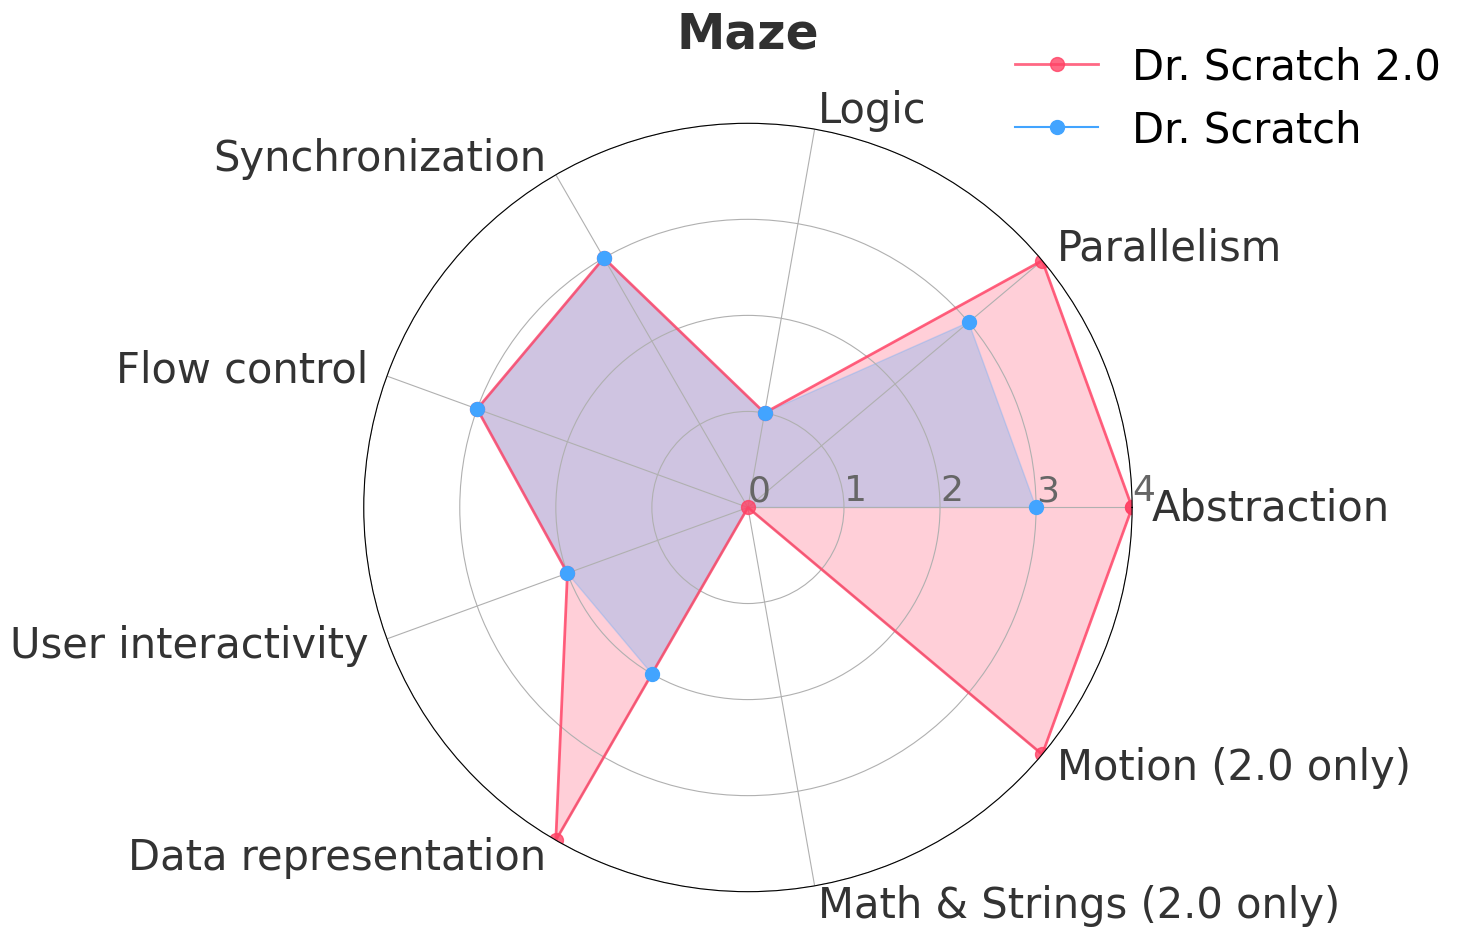

[10, 10, 10, 10, 10, 10, 10, 0, 0, 0]


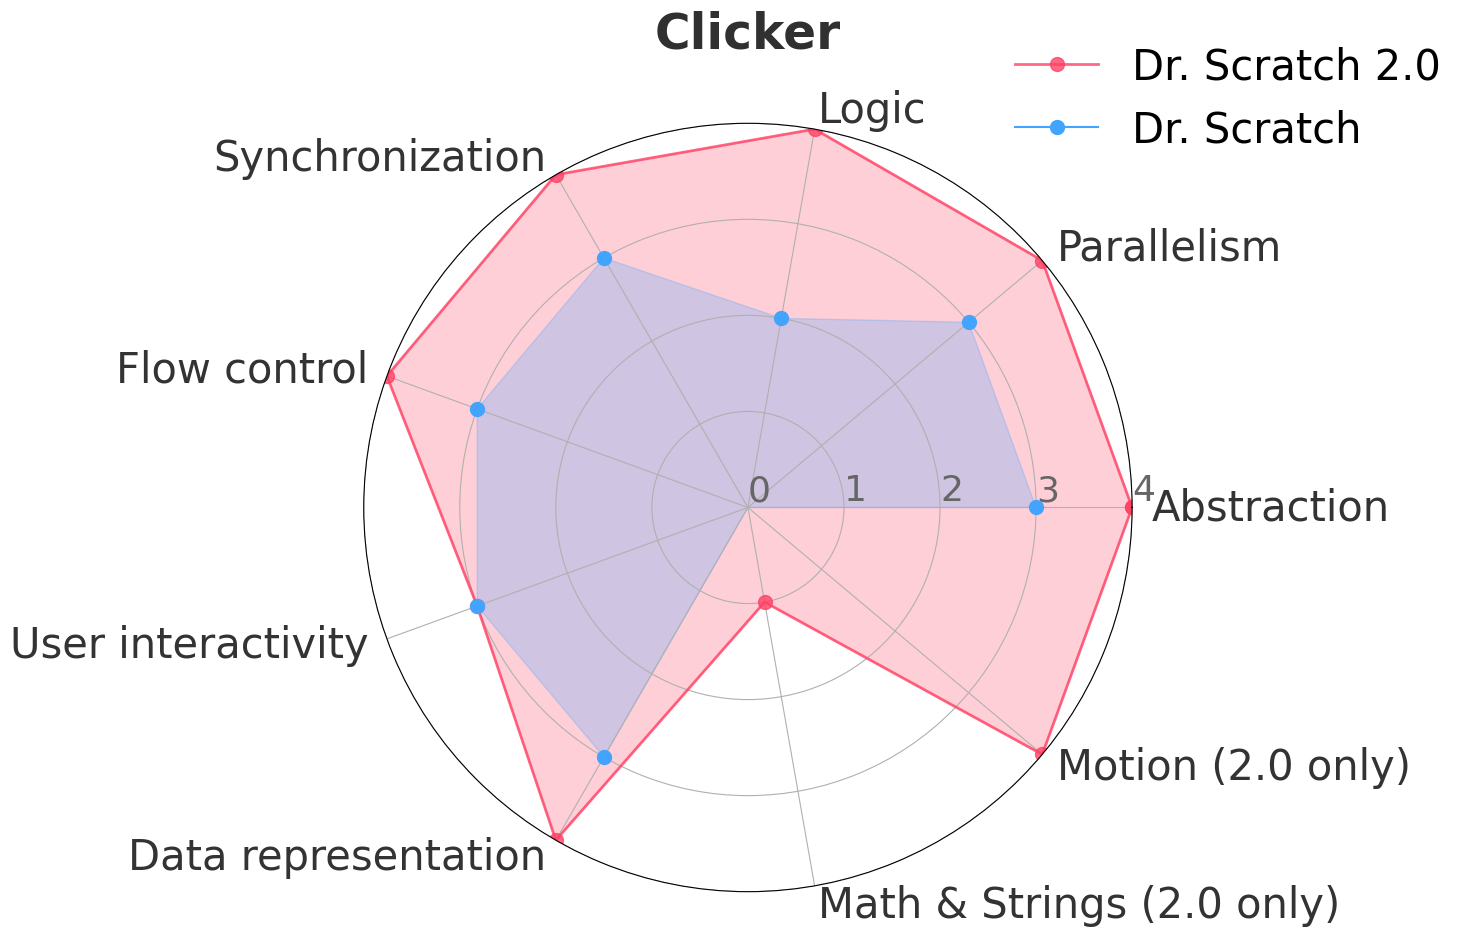

[10, 10, 10, 10, 10, 10, 10, 0, 0, 0]


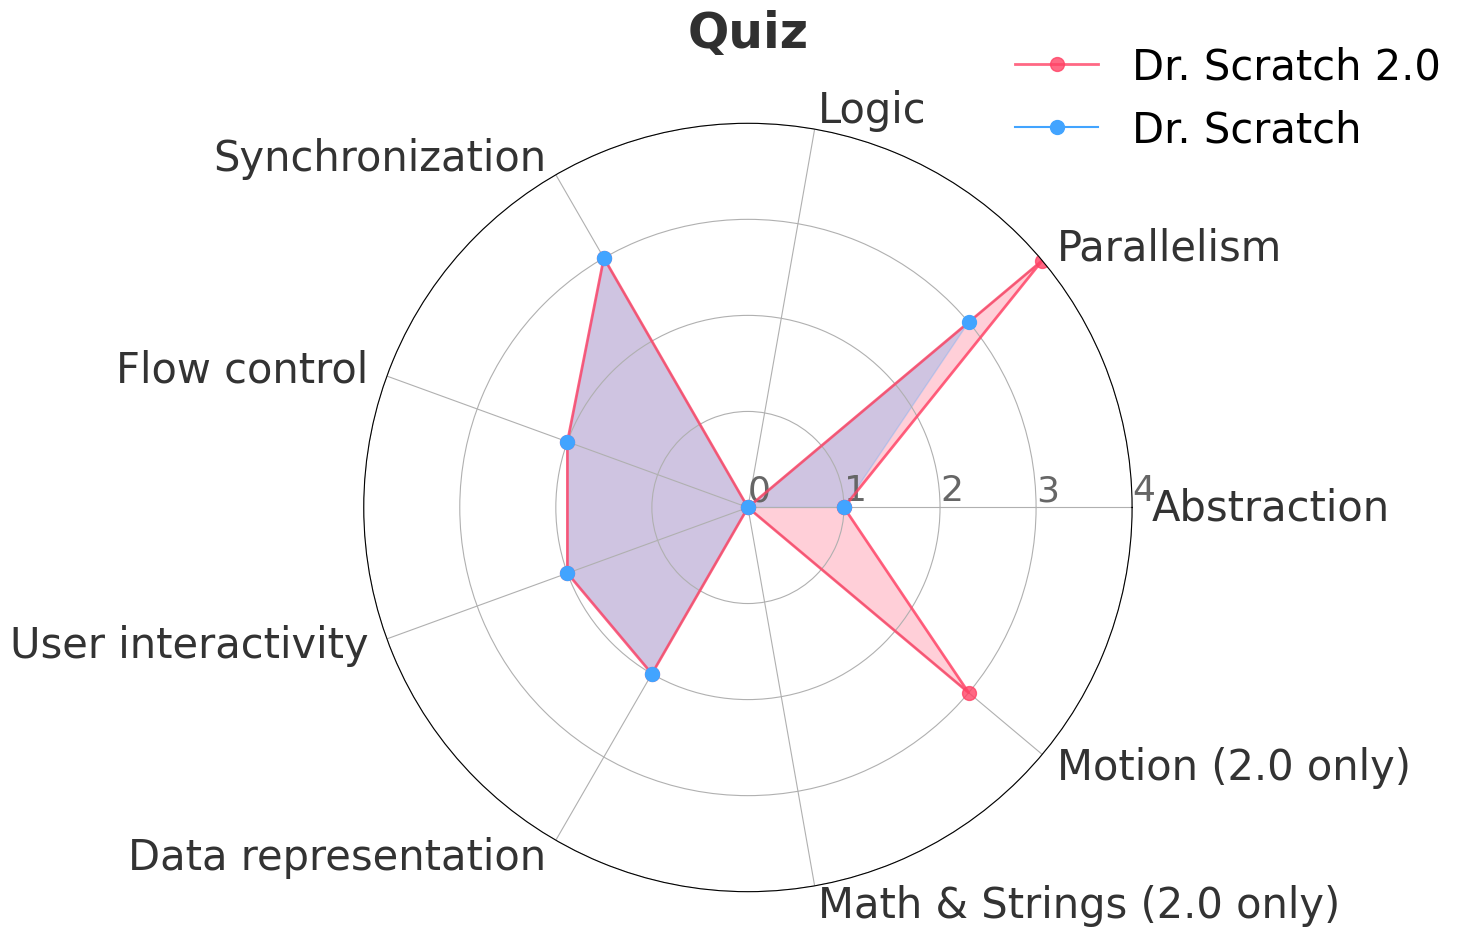

[10, 10, 10, 10, 10, 10, 10, 0, 0, 0]


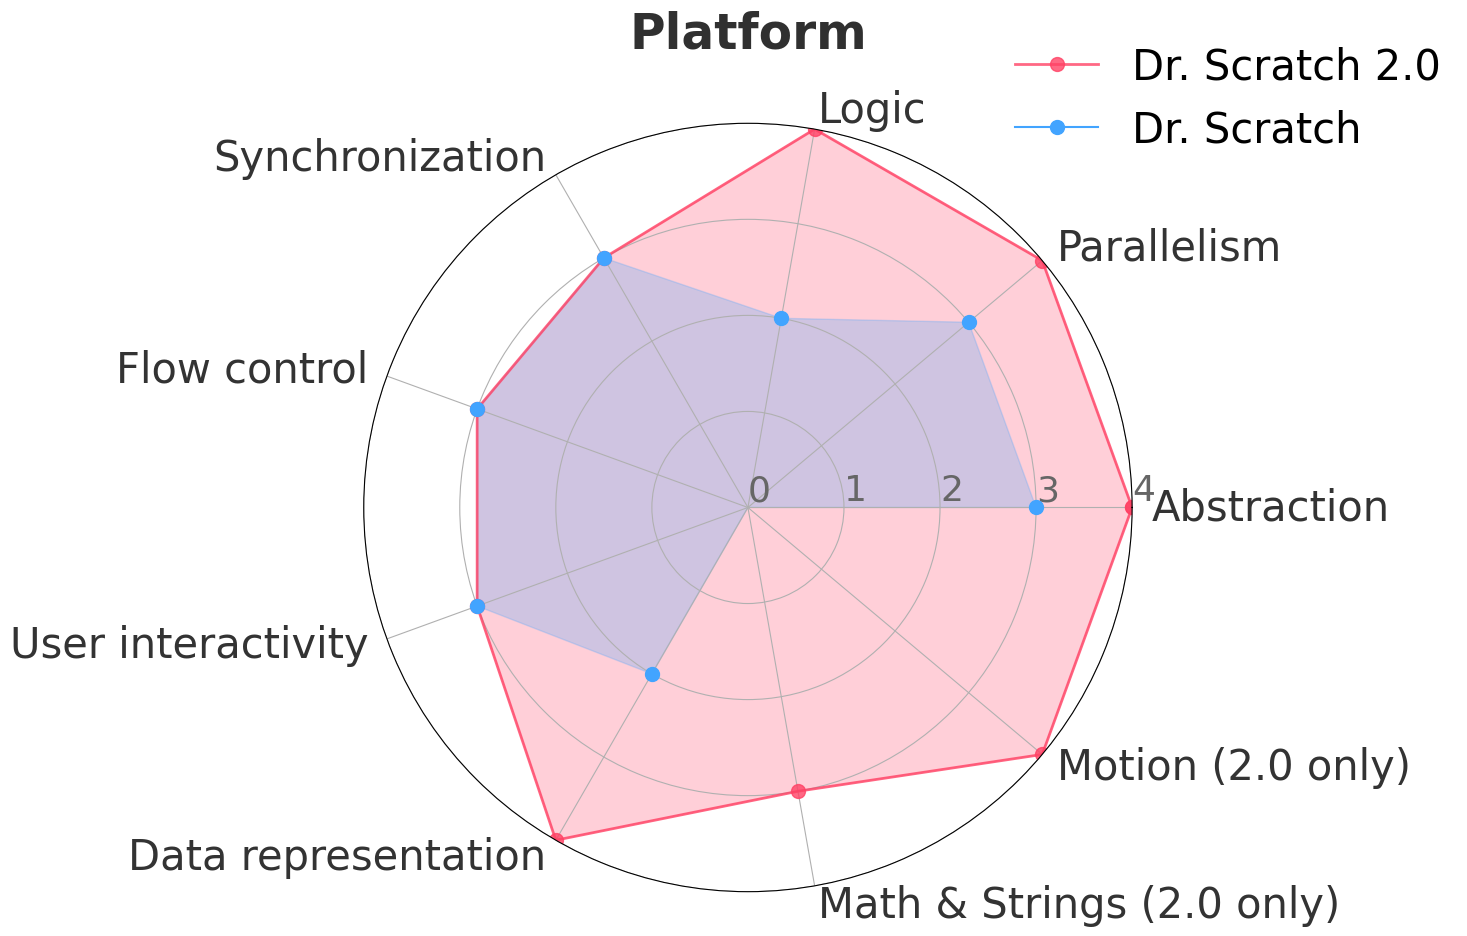

In [15]:
import matplotlib.pyplot as plt
import numpy as np
def plot_radar_charts(groups, group_name, name):
    fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(polar=True))
    
    # Background color
    df = groups[0]
    
    ax.set_facecolor('#ffffff')

    # Extract dimensions and calculate means
    dims = df.iloc[:, 6:15]  # Adjust the indices according to your data
    dims_names = dims.columns.tolist()
    
    # Convert text values to numeric, removing NaNs
    dim_means = dims.apply(lambda x: x.str.split('/').str[0].astype(float)).mean()
    dim_means = [round(n, 2) for n in dim_means]
    
    # Prepare data for radar plot
    num_vars = len(dims_names)
    angles = [n * 2 * np.pi / num_vars for n in range(num_vars)]
    angles += angles[:1]
    
    dim_means += dim_means[:1]
    
    # Plot the first group data
    line_color = "#ff4265"
    ax.plot(angles, dim_means, linewidth=2, linestyle='solid', color=line_color, label='Dr. Scratch 2.0', markersize=10, marker='o', alpha=0.8)
    ax.fill(angles, dim_means, color=line_color, alpha=0.25)

    # Plot other groups if available
    for idx, df in enumerate(groups[1:], start=1):        
        dims = df.iloc[:, 6:15]  # Adjust according to your dataset
        dim_means = dims.apply(lambda x: x.str.split('/').str[0].astype(float)).mean()
        dim_means = [round(n, 2) for n in dim_means]
        dim_means += dim_means[:1]
    
        # Plot the additional group's data
        line_color = "#42a4ff"

        marker_sizes = [0 if i in [7, 8, 9] else 10 for i in range(len(dim_means))]
        print(marker_sizes)
        label_added = False  # Bandera para controlar si el label ya se ha añadido
        
        for idx, (angle, mean, marker_size) in enumerate(zip(angles, dim_means, marker_sizes)):
            if marker_size > 0:
                if not label_added:
                    # Añadir el label solo una vez
                    ax.plot([angle], [mean], label='Dr. Scratch', marker='o', markersize=marker_size, color=line_color)
                    label_added = True  # Cambiar la bandera a True para evitar añadir el label de nuevo
                else:
                    # Otros puntos sin label
                    ax.plot([angle], [mean], marker='o', markersize=marker_size, color=line_color)
            else:
                # Puntos sin marcador
                ax.plot([angle], [mean], color=line_color)
        ax.fill(angles, dim_means, color=line_color, alpha=0.25)

    # Set the radar chart configuration
    ax.set_rlabel_position(0)
    ax.set_ylim(0, 4)
    ax.set_yticks(np.arange(0, 5, 1))
    ax.set_yticklabels(np.arange(0, 5, 1), fontsize=26, color='#666666')
    
    # Set the ticks for the dimensions
    ax.set_xticks(angles[:-1])

    # Adjusting dimension labels (make sure it matches the actual dimensions)
    dims_names = ['Abstraction', 'Parallelism', 'Logic', 'Synchronization', 
                  'Flow control', 'User interactivity', 'Data representation', 'Math & Strings (2.0 only)',"Motion (2.0 only)"]
    
    ax.set_xticklabels(dims_names, fontsize=30, color='#333333', fontweight='light')
    
    # Adjust label alignment and rotation for readability
    for label, angle in zip(ax.get_xticklabels(), angles):
        dim_name = label.get_text()
        x, y = label.get_position()  # Obtener la posición actual
        if dim_name in ["Parallelism", "Abstraction", "Math & Strings (2.0 only)", "Motion (2.0 only)","Logic"]:
            label.set_horizontalalignment('left')
            label.set_position((x + 0.5, y))  # Ajusta el valor según necesites
        elif dim_name in ["Synchronization", "Flow control", "User interactivity",  "Data representation"]:
            label.set_horizontalalignment('right')
            label.set_position((x - 0.1, y))  # Ajusta el valor según necesites
        # Rotar las etiquetas ligeramente para mayor legibilidad
        label.set_rotation(angle * 180 / np.pi)
        label.set_verticalalignment('center')



    # Add legend and title
    plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1.15), fontsize=30, frameon=False)
    plt.title(f'{name}', fontsize=35, color='#303030', fontweight='bold', pad=30)

    # Adjust layout
    plt.tight_layout(pad=3.0)

    # Save and show the radar chart
    plt.savefig(f'./metrics_together/color1/{name}.png', bbox_inches='tight', facecolor=fig.get_facecolor())
    plt.show()

# Ejecución de la función para los grupos
for (name_ext, df_ext), (name_van, df_van) in zip(main_genres_subsets_new.items(), main_genres_subsets_old.items()):
    if name_ext == name_van:
        plot_radar_charts((df_ext, df_van), f"{name_ext} Extended/Vailla Metrics", name_ext)

